# Resumen Ejecutivo: Segmentación y Caracterización de Perfiles Hidrogeoquímicos en Aguas Subterráneas Mediante Clustering No Supervisado

### Estudiantes
Amanda Alpízar Araya
Alonso Arias Mora
Danny Valverde Agüero

### Introducción y Objetivos

Este documento detalla el proceso de análisis y modelado de un conjunto de datos sobre la calidad del agua de 1,068 sitios de monitoreo de aguas subterráneas en México durante el año 2020. El **objetivo principal** fue aplicar técnicas de machine learning no supervisado para ir más allá de una simple clasificación y descubrir las **"firmas" o perfiles hidrogeoquímicos** subyacentes en los datos. La meta final no era solo agrupar matemáticamente las muestras, sino **traducir estas agrupaciones en perfiles descriptivos, interpretables y accionables** que pudieran informar estratégicamente la gestión de recursos hídricos.

### Metodología Estratégica

El proyecto se ejecutó siguiendo un pipeline de ciencia de datos riguroso y por etapas, diseñado para garantizar la robustez, interpretabilidad y defensibilidad de los resultados:

1.  **Preparación y Limpieza de Datos:** Se realizó un exhaustivo proceso de limpieza que incluyó la corrección de tipos de datos, el manejo de formatos no estándar y una estrategia de **imputación inteligente** para los valores ausentes.
2.  **Análisis Exploratorio de Datos (EDA):** Se investigaron sistemáticamente las distribuciones, cardinalidad, correlaciones y patrones espaciales para construir un diagnóstico profundo de la estructura de los datos.
3.  **Ingeniería de Características (Modelo Base):** Basado en el EDA, se construyó un **modelo base** seleccionando únicamente las mediciones primarias. Se aplicaron transformaciones logarítmicas para corregir el sesgo y estandarización para igualar las escalas, siguiendo las mejores prácticas para algoritmos basados en distancia.
4.  **Modelado y Selección de `k`:** Se utilizó el algoritmo K-Means. Se emplearon el Método del Codo y la Puntuación de Silueta para determinar que **k=11** era el número óptimo de clusters, una decisión reforzada al observar la capacidad del modelo para aislar outliers de forma natural con esta configuración.
5.  **Validación y Refinamiento:** Se realizó un análisis **post-hoc** para validar la suficiencia del modelo base. Se probó si características de ingeniería complejas (ratios geoquímicos) aportaban nueva información, concluyendo que el modelo base ya capturaba estas relaciones implícitamente, validando su robustez.
6.  **Interpretación y Visualización:** Finalmente, los 11 clusters fueron caracterizados en detalle y visualizados geográficamente para conectar los perfiles matemáticos con el contexto del mundo real.

### El Rol Clave de los Metadatos (Archivo `Escalas_subterranea.csv`)

Un componente fundamental del proyecto fue la integración de un archivo de metadatos que contenía las **reglas de negocio** para la clasificación del agua. Este fue procesado y utilizado como una "guía de traducción" en dos momentos críticos:

1.  **Durante la Limpieza:** Permitió una **imputación consistente** de datos faltantes, asegurando la integridad lógica del dataset.
2.  **Durante la Interpretación:** Fue indispensable para **traducir los centroides numéricos** de cada cluster en descripciones humanas comprensibles (ej. un valor de Arsénico de 0.045 mg/L se tradujo a "No apta como FAAP"), transformando la salida matemática en insights de negocio.

### Hallazgos y Resultados Clave

-   **Construcción de un Modelo Robusto:** Las decisiones de ingeniería de características (transformación logarítmica, estandarización y eliminación selectiva de variables redundantes) fueron cruciales para el éxito de un modelo K-Means que demostró ser suficiente y no requerir de complejidad adicional (como PCA o ratios de ingeniería).

-   **Identificación de 11 Perfiles Únicos:** El análisis segmentó exitosamente el dataset en **7 perfiles de patrones principales y 4 perfiles de anomalías**. Estos perfiles son distintos, interpretables y geográficamente coherentes.

-   **Descubrimiento de Firmas Geoquímicas:** El modelo, sin información contextual previa, logró identificar clusters que se corresponden fuertemente con regiones hidrogeológicas conocidas. Los hallazgos más notables incluyen:
    *   Un perfil de **"Agua Dura de Buena Calidad" casi exclusivo de la Península de Yucatán (Cluster 9)**.
    *   Perfiles de **"Contaminación Natural por Arsénico y Flúor" concentrados en el norte y noroeste del país (Clusters 7 y 10)**.
    *   La **identificación y aislamiento de 4 perfiles de anomalías**, cada uno representando una muestra o un pequeño grupo de muestras con problemas de contaminación muy específicos y severos (por Cromo, Mercurio, Coliformes y Plomo).

### Conclusión General

El análisis fue un éxito rotundo. Se ha desarrollado y validado un modelo de clustering que segmenta eficazmente el conjunto de datos en **11 perfiles de calidad del agua distintos y accionables**. El resultado final no es solo un modelo entrenado, sino un **sistema de clasificación robusto** que puede ser utilizado para caracterizar nuevas muestras y, lo que es más importante, una serie de **insights estratégicos** que permiten visualizar la geografía de la calidad del agua en México, guiando así los esfuerzos de monitoreo, tratamiento y gestión de recursos hídricos a nivel regional.

### Sección 1: Configuración del Entorno y Carga de Datos

#### Resumen Ejecutivo de la Sección

El objetivo de esta sección inicial fue establecer el entorno de trabajo, cargar las fuentes de datos primarias y secundarias, y realizar una evaluación diagnóstica inicial de la calidad y estructura de los datos. Este paso es fundamental para definir la estrategia de preprocesamiento y análisis subsiguiente.

#### Metodología y Ejecución

1.  **Configuración del Entorno:** Se importaron las librerías estándar de Python para el análisis de datos (`pandas`, `numpy`), visualización (`matplotlib`, `seaborn`) y manipulación de texto (`re`). Adicionalmente, se configuraron los parámetros estéticos para las visualizaciones.

2.  **Carga del Conjunto de Datos Principal:** El archivo `Datos_de_calidad_del_agua_..._2020.csv` fue cargado en un DataFrame de pandas (`df`). Se especificó la codificación `latin-1` para asegurar la correcta interpretación de caracteres especiales del idioma español.

3.  **Carga de Metadatos:** El archivo de reglas de negocio, `Escalas_subterranea.csv`, fue cargado como una cadena de texto cruda (`criteria_raw_text`), dado que su formato no es tabular estándar y requiere un parseo personalizado en la siguiente sección.

4.  **Inspección Inicial:** Se ejecutaron los comandos `df.head()` y `df.info()` para obtener una vista preliminar de la estructura, los tipos de datos y la completitud del conjunto de datos principal.

#### Análisis de Resultados

La ejecución de la celda fue exitosa y la inspección inicial reveló los siguientes puntos críticos que guiarán el resto del análisis:

*   **Dimensiones del Dataset:** El conjunto de datos principal consta de **1068 registros y 57 columnas**.
*   **Identificación de Tipos de Datos Incorrectos:** El resumen de `df.info()` mostró que múltiples columnas que representan mediciones cuantitativas (ej. `AS_TOT_mg/L`) fueron cargadas con el tipo de dato `object`. Esto confirma la presencia de caracteres no numéricos que deben ser procesados.
*   **Detección de Valores Ausentes:** El conteo de valores no nulos evidenció la presencia de datos faltantes en varias columnas. Destaca la columna `SDT_mg/L`, la cual se encuentra completamente vacía, y otras con ausencias parciales que requerirán un tratamiento de imputación.

#### Conclusión de la Sección

Esta sección ha establecido exitosamente la base para el proyecto. Los datos han sido cargados y, a través de una inspección inicial, se ha generado un diagnóstico claro de los desafíos de calidad de datos que deben ser abordados: la corrección de tipos de datos, el manejo de formatos no estándar y la imputación de valores ausentes.

In [1]:
# --- Sección 1: Configuración del Entorno y Carga de Datos ---

# Importar las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import warnings

# Ignorar advertencias (warnings) para mantener una salida limpia
warnings.filterwarnings("ignore")

# Configurar el estilo y tamaño de las gráficas para una mejor estética
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# --- 1. Cargar el conjunto de datos principal desde el archivo CSV ---
main_file_path = 'datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
try:
    df = pd.read_csv(main_file_path, encoding='latin-1')
    print(f"El conjunto de datos principal se cargó exitosamente desde: '{main_file_path}'.")
    print(f"Dimensiones del dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: '{main_file_path}'")
    print("Por favor, actualiza la variable 'main_file_path' con la ubicación correcta del archivo.")
    df = None # Asignar None a df para prevenir errores futuros

# --- 2. Cargar los metadatos (criterios de calidad) desde su archivo CSV ---
criteria_file_path = 'datos/Escalas_subterranea.csv'
try:
    # Leemos el archivo como una única cadena de texto, ya que su estructura no es un CSV estándar
    with open(criteria_file_path, 'r', encoding='latin-1') as f:
        criteria_raw_text = f.read()
    print(f"Los metadatos de criterios se cargaron exitosamente desde: '{criteria_file_path}'.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: '{criteria_file_path}'")
    print("Por favor, actualiza la variable 'criteria_file_path' con la ubicación correcta del archivo.")
    criteria_raw_text = None

# --- 3. Mostrar información inicial del DataFrame principal ---
if df is not None:
    print("\n--- Primeras 5 filas del conjunto de datos ---")
    display(df.head())
    print("\n--- Información general y tipos de datos de las columnas ---")
    df.info()

El conjunto de datos principal se cargó exitosamente desde: 'datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'.
Dimensiones del dataset: (1068, 57)
Los metadatos de criterios se cargaron exitosamente desde: 'datos/Escalas_subterranea.csv'.

--- Primeras 5 filas del conjunto de datos ---


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI



--- Información general y tipos de datos de las columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L  

### Sección 2: Procesamiento de Metadatos y Definición de Funciones de Clasificación

#### Resumen Ejecutivo de la Sección

El objetivo fundamental de esta sección fue la ingeniería de datos aplicada a los metadatos del proyecto. Se desarrolló un proceso para transformar las reglas de negocio, provistas en el archivo `Escalas_subterranea.csv`, desde un formato de texto semi-estructurado a una estructura de datos programática y consultable. Adicionalmente, se implementó una función de clasificación que utiliza estas reglas para la evaluación automatizada de la calidad del agua.

#### Metodología y Ejecución

1.  **Mapeo de Entidades:** Para garantizar la interoperabilidad entre el conjunto de datos principal y los metadatos, se establecieron diccionarios de mapeo (`param_map`, `header_word_map`). Estos aseguran una correspondencia unívoca y robusta entre las abreviaturas de los parámetros, los nombres completos de las columnas y los descriptores textuales en los archivos.

2.  **Extracción y Estructuración de Reglas:** Se diseñó la función `parse_criteria` para procesar el contenido de los metadatos. Mediante el uso de expresiones regulares (`regex`), esta función extrae de cada línea de texto los componentes esenciales de una regla de clasificación:
    *   **Etiqueta de Calidad:** La clasificación categórica final (ej. "Apta como FAAP").
    *   **Límites Numéricos:** Los umbrales cuantitativos que definen el rango de aplicación de la etiqueta (ej. `[0.01, 0.025]`).
    
    El producto de esta función es el diccionario `quality_rules`, un objeto estructurado que sirve como base de conocimiento para el sistema.

3.  **Implementación de la Lógica de Clasificación:** Se desarrolló la función `get_quality_label_from_value`, la cual encapsula la lógica para evaluar un valor numérico de entrada contra las reglas almacenadas en `quality_rules`. Dados un parámetro y un valor, la función retorna la etiqueta de calidad categórica correspondiente.

#### Conclusión de la Sección

El resultado de esta fase es doble: se ha creado un **repositorio estructurado de las reglas de negocio (`quality_rules`)** y una **herramienta funcional (`get_quality_label_from_value`)** para su aplicación. La correcta estructuración de las reglas para el parámetro Arsénico, mostrada en la salida de la celda, valida el éxito del proceso de parseo.

Esta capacidad de clasificar programáticamente los datos numéricos es un pilar para las siguientes etapas del análisis, particularmente para la imputación consistente de datos faltantes y, de manera crucial, para la interpretación y caracterización de los clusters que se generarán en la fase de modelado.

In [2]:
# --- Sección 2: Parseo de Metadatos y Definición de Funciones de Clasificación ---

# Crear un mapeo desde los nombres cortos de los parámetros (claves) a los nombres completos de las columnas en el DataFrame principal
param_map = {
    'COLI_FEC': 'COLI_FEC_NMP/100_mL', 'SDT_salin': 'CALIDAD_SDT_salin',
    'SDT_ra': 'CALIDAD_SDT_ra', 'CR': 'CR_TOT_mg/L', 'CONDUC': 'CONDUCT_mS/cm',
    'CD': 'CD_TOT_mg/L', 'AS': 'AS_TOT_mg/L', 'ALC': 'ALC_mg/L',
    'PB': 'PB_TOT_mg/L', 'N_NO3': 'N_NO3_mg/L', 'MN': 'MN_TOT_mg/L',
    'HG': 'HG_TOT_mg/L', 'FLUO': 'FLUORUROS_mg/L', 'FE': 'FE_TOT_mg/L',
    'DUR': 'DUR_mg/L', 'SDT': 'SDT_M_mg/L'
}

# Invertir el mapa para una búsqueda fácil desde el nombre completo de la columna a la clave corta
column_to_param_map = {v: k for k, v in param_map.items()}

# Nuevo: Mapeo robusto desde la palabra clave en español en el encabezado a nuestra clave corta
header_word_map = {
    'COLIFORMES': 'COLI_FEC', 'CROMO': 'CR', 'CONDUCTIVIDAD': 'CONDUC',
    'CADMIO': 'CD', 'ARSENICO': 'AS', 'ALCALINIDAD': 'ALC', 'PLOMO': 'PB',
    'NITRATOS': 'N_NO3', 'MANGANESO': 'MN', 'MERCURIO': 'HG',
    'FLUORUROS': 'FLUO', 'HIERRO': 'FE', 'DUREZA': 'DUR'
}

def parse_criteria(criteria_string):
    """Parsea (procesa) el texto de los criterios para convertirlo en un diccionario estructurado."""
    if criteria_string is None:
        print("El texto de los criterios no está disponible. No se puede procesar.")
        return None
        
    lines = criteria_string.strip().split('\n')
    parsed_rules = {}
    current_param_key = None

    for line in lines:
        parts = [p.strip() for p in line.split(',', 2)]
        
        if parts[0].startswith('CALIDAD DEL AGUA PARA'):
            header_text = parts[0]
            current_param_key = None # Reiniciar para cada nuevo encabezado
            if "SALINIZACION" in header_text: current_param_key = "SDT_salin"
            elif "RIEGO AGRICOLA" in header_text: current_param_key = "SDT_ra"
            else:
                # Iterar a través de nuestro nuevo mapa robusto
                for word, key in header_word_map.items():
                    if word in header_text:
                        current_param_key = key
                        break # Se encontró una coincidencia, detener la búsqueda
            if current_param_key:
                parsed_rules[current_param_key] = []

        elif current_param_key and len(parts) > 1 and not parts[0].lower() == 'criterio':
            quality_label, rule_text = parts[0], parts[1]
            numbers = [float(x) for x in re.findall(r'[-+]?\d*\.\d+|\d+', rule_text)]
            if current_param_key in parsed_rules: # Asegurarse de que la clave fue inicializada
                parsed_rules[current_param_key].append({'label': quality_label, 'text': rule_text, 'numbers': numbers})
    return parsed_rules

# Procesar las reglas desde el texto cargado en la Sección 1
quality_rules = parse_criteria(criteria_raw_text)

# Verificar si el parseo fue exitoso mostrando un ejemplo
if quality_rules and quality_rules.get('AS'):
    print("Metadatos procesados exitosamente. Ejemplo para 'Arsénico (AS)':")
    print(json.dumps(quality_rules.get('AS', {}), indent=2, ensure_ascii=False))
else:
    print("No se pudieron procesar los metadatos correctamente. Revisa la lógica de parseo y el contenido del archivo.")
    print("Estado actual del parseo para 'AS':", quality_rules.get('AS', 'No encontrado'))


# --- DEFINICIÓN DE LA FUNCIÓN DE AYUDA ---
def get_quality_label_from_value(param_key, value, rules_dict):
    """Encuentra la etiqueta de calidad correcta para un valor numérico dado, basándose en las reglas procesadas."""
    if not rules_dict or param_key not in rules_dict:
        return "N/A"
    
    for rule in rules_dict[param_key]:
        text, nums = rule['text'].lower(), rule['numbers']
        try:
            if 'menor o igual a' in text and len(nums) == 1:
                if value <= nums[0]: return rule['label']
            elif 'menor de' in text and 'mayor o igual a' in text and len(nums) == 2:
                 if nums[0] <= value < nums[1]: return rule['label']
            elif 'menor a' in text and len(nums) == 1:
                if value < nums[0]: return rule['label']
            elif 'mayor o igual a' in text and 'menor o igual a' in text and len(nums) == 2:
                if nums[0] <= value <= nums[1]: return rule['label']
            elif 'mayor de' in text and 'menor o igual a' in text and len(nums) == 2:
                if nums[0] < value <= nums[1]: return rule['label']
            elif 'mayor de' in text and len(nums) == 1:
                if value > nums[0]: return rule['label']
            elif 'mayor o igual a' in text and len(nums) == 1:
                if value >= nums[0]: return rule['label']
        except (TypeError, IndexError):
            continue
    return "Sin regla coincidente"

Metadatos procesados exitosamente. Ejemplo para 'Arsénico (AS)':
[
  {
    "label": "Potable - Excelente",
    "text": "AS menor o igual a 0.01",
    "numbers": [
      0.01
    ]
  },
  {
    "label": "Apta como FAAP",
    "text": "AS mayor de 0.01 y menor o igual a 0.025",
    "numbers": [
      0.01,
      0.025
    ]
  },
  {
    "label": "No apta como FAAP",
    "text": "AS mayor de 0.025",
    "numbers": [
      0.025
    ]
  }
]


### Sección 3: Limpieza y Preprocesamiento de Datos

#### Resumen Ejecutivo de la Sección

El propósito de esta sección fue ejecutar un pipeline de limpieza de datos exhaustivo para transformar el conjunto de datos crudo en un formato analíticamente viable. El proceso abordó sistemáticamente los problemas de calidad de datos identificados en la fase de carga: tipos de datos incorrectos, formatos de valor no numéricos y la presencia de valores ausentes en múltiples columnas.

#### Metodología y Ejecución

1.  **Corrección de Tipos de Datos:** Se identificaron las columnas que, a pesar de representar mediciones cuantitativas, fueron cargadas con tipo `object` debido a la presencia de caracteres no numéricos (ej. `'<'`). Se aplicó una función (`clean_numeric`) para eliminar dichos caracteres y convertir estas columnas a un tipo de dato numérico (`float64`).

2.  **Manejo de Valores Ausentes:** Se implementó una estrategia de imputación en dos fases:
    *   **Imputación Inteligente (Medidas y Calidad):** Para las columnas de mediciones con ausencias parciales, se rellenaron los valores numéricos faltantes con la **mediana** de su respectiva columna (una medida robusta a outliers). De manera crucial, se utilizó la función `get_quality_label_from_value` para **inferir y rellenar la etiqueta categórica (`CALIDAD_*`) correspondiente**, garantizando la consistencia lógica entre los datos numéricos y cualitativos.
    *   **Imputación Lógica (`CONTAMINANTES`):** Se identificó que los valores nulos en la columna `CONTAMINANTES` indicaban la ausencia de problemas de calidad. Por lo tanto, estos 434 valores faltantes fueron explícitamente rellenados con la etiqueta **"Sin Contaminantes"**, completando así la columna.
    *   **Eliminación de Columnas:** La columna `SDT_mg/L` fue eliminada por carecer completamente de datos (100% de valores nulos).

#### Conclusión de la Sección

El proceso fue exitoso, como lo demuestra el informe final de `df.info()`, que confirma la ausencia total de valores nulos en el DataFrame. El resultado es un único DataFrame, `df_cleaned`, que está **completo, limpio y lógicamente consistente**. Todas las columnas numéricas tienen el tipo de dato correcto y todas las celdas han sido rellenadas de manera informada.

Este DataFrame `df_cleaned` constituye la base sólida y confiable sobre la cual se construirán todos los análisis visuales, estadísticos y de modelado en las secciones posteriores.

In [3]:
# --- Sección 3: Limpieza y Preprocesamiento de Datos ---

if df is not None:
    df_cleaned = df.copy()

    # Definir qué columnas deberían ser mediciones numéricas
    numerical_cols = [
        'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 
        'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 
        'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]
    
    # Función para convertir columnas de tipo 'object' con símbolos '<' a numéricas
    def clean_numeric(value):
        if isinstance(value, str):
            value = value.replace('<', '').strip()
        return pd.to_numeric(value, errors='coerce')

    # Aplicar la función de limpieza a todas las columnas numéricas potenciales
    for col in numerical_cols:
        if col in df_cleaned.columns and df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].apply(clean_numeric)

    # --- 1. Manejo de Valores Faltantes (Excepto 'CONTAMINANTES') ---
    print("--- Análisis de Valores Faltantes (Antes de la Imputación) ---")
    missing = df_cleaned.isnull().sum()
    missing = missing[missing > 0]
    print(missing.sort_values(ascending=False))
    
    # Eliminar la columna SDT_mg/L ya que está 100% vacía
    if 'SDT_mg/L' in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=['SDT_mg/L'])
        numerical_cols.remove('SDT_mg/L')
    
    # Imputar (rellenar) las columnas numéricas y sus correspondientes columnas categóricas
    print("\n--- Imputando Valores Faltantes (Medidas y Calidad) ---")
    for col in numerical_cols:
        if df_cleaned[col].isnull().sum() > 0:
            # Obtener los índices de las filas con valores faltantes ANTES de rellenar
            missing_indices = df_cleaned[df_cleaned[col].isnull()].index
            
            # Calcular la mediana y rellenar la columna numérica
            median_val = df_cleaned[col].median()
            df_cleaned[col] = df_cleaned[col].fillna(median_val)
            print(f"Se rellenaron {len(missing_indices)} valores faltantes en '{col}' con la mediana: {median_val}")

            # Rellenar la(s) columna(s) categórica(s) correspondiente(s)
            if col == 'SDT_M_mg/L':
                quality_cols_info = [('SDT_ra', 'CALIDAD_SDT_ra'), ('SDT_salin', 'CALIDAD_SDT_salin')]
            else:
                param_key = column_to_param_map.get(col)
                if param_key:
                    quality_cols_info = [(param_key, f"CALIDAD_{param_key}")]
                else:
                    quality_cols_info = []

            for param_key, quality_col_name in quality_cols_info:
                if quality_col_name in df_cleaned.columns:
                    for idx in missing_indices:
                        imputed_value = df_cleaned.loc[idx, col]
                        label = get_quality_label_from_value(param_key, imputed_value, quality_rules)
                        df_cleaned.loc[idx, quality_col_name] = label
                    print(f"  -> Se infirieron y rellenaron las etiquetas para '{quality_col_name}'.")

    # --- 2. Manejo de Valores Faltantes en la Columna 'CONTAMINANTES' ---
    print("\n--- Imputando Valores Faltantes (Columna 'CONTAMINANTES') ---")
    missing_before = df_cleaned['CONTAMINANTES'].isnull().sum()
    print(f"Valores faltantes en 'CONTAMINANTES' antes del relleno: {missing_before}")
    
    if missing_before > 0:
        df_cleaned['CONTAMINANTES'].fillna('Sin Contaminantes', inplace=True)
        missing_after = df_cleaned['CONTAMINANTES'].isnull().sum()
        print(f"Se rellenaron {missing_before} valores.")
        print(f"Valores faltantes en 'CONTAMINANTES' después del relleno: {missing_after}")
    else:
        print("La columna 'CONTAMINANTES' no tiene valores faltantes.")


    # --- 3. Verificación Final ---
    print("\n--- Tipos de Datos e Información Final (Después de la Imputación Completa) ---")
    total_missing_after_imputation = df_cleaned.isnull().sum().sum()
    
    if total_missing_after_imputation == 0:
        print("¡Éxito! El DataFrame ya no contiene ningún valor faltante.")
    else:
        print(f"Advertencia: Aún quedan {total_missing_after_imputation} valores faltantes en el dataset.")
    
    df_cleaned.info()

--- Análisis de Valores Faltantes (Antes de la Imputación) ---
SDT_mg/L             1068
CONTAMINANTES         434
CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
ALC_mg/L                4
CALIDAD_ALC             4
SDT_M_mg/L              2
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
DUR_mg/L                1
CALIDAD_DUR             1
N_NO3_mg/L              1
CALIDAD_N_NO3           1
dtype: int64

--- Imputando Valores Faltantes (Medidas y Calidad) ---
Se rellenaron 4 valores faltantes en 'ALC_mg/L' con la mediana: 215.5275
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_ALC'.
Se rellenaron 6 valores faltantes en 'CONDUCT_mS/cm' con la mediana: 815.0
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_CONDUC'.
Se rellenaron 2 valores faltantes en 'SDT_M_mg/L' con la mediana: 550.4
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_SDT_ra'.
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_SDT_salin'.
Se rellenaron 1 valores faltantes

### Sección 4.0: Análisis Profundo de Cardinalidad

#### Resumen Ejecutivo de la Sección

En esta sección, se realizó un análisis exhaustivo de la cardinalidad para entender la complejidad de las variables categóricas. El objetivo fue cuantificar con precisión el número de valores únicos para cada característica, con el fin de informar las decisiones de ingeniería de características, prestando especial atención a las variables de alta granularidad como `ACUIFERO` y la naturaleza multi-etiqueta de `CONTAMINANTES`.

#### Metodología y Ejecución

La metodología se estructuró en dos fases analíticas:

1.  **Análisis Específico de `CONTAMINANTES`:** Se procesó primero la columna `CONTAMINANTES` para desglosar sus valores multi-etiqueta, calculando el número real de tipos de contaminantes únicos.
2.  **Análisis General Integrado:** Posteriormente, se calculó la cardinalidad para todas las variables categóricas, utilizando el recuento corregido y preciso para `CONTAMINANTES`. Los resultados se visualizaron mediante un gráfico de barras para una comparación directa y un gráfico de pastel para mostrar la proporción de variables en cada nivel de cardinalidad.

#### Análisis de Resultados

1.  **Identificación de Variables de Alta Cardinalidad:**
    *   El gráfico de barras general fue clave para identificar las variables problemáticas. Se confirmó que `CLAVE` (1068) y `SITIO` (1066) son identificadores únicos.
    *   De manera crucial, se reveló que las variables geográficas categóricas, **`MUNICIPIO` (452) y `ACUIFERO` (273)**, poseen una cardinalidad extremadamente alta. Esto las hace inviables para ser usadas directamente en un modelo de clustering mediante técnicas como one-hot encoding, ya que crearían un espacio de características demasiado grande y disperso.
    *   **Implicación Crítica:** Este hallazgo proporciona una justificación sólida y fundamental para la estrategia de **utilizar las coordenadas `LONGITUD` y `LATITUD` como los principales descriptores espaciales**, en lugar de estas categorías tan granulares.

2.  **Análisis Detallado de `CONTAMINANTES`:**
    *   Aunque el conteo inicial de combinaciones era de 127, el análisis profundo reveló que el número real de **tipos de contaminantes únicos es de solo 17**.
    *   La visualización de frecuencias demostró que los problemas de calidad más recurrentes son la **Dureza Total (`DT`)**, los **Fluoruros (`FLUO`)**, el **Arsénico (`AS`)** y el **Hierro (`FE`)**.

3.  **Variables de Baja y Media Cardinalidad:**
    *   La mayoría de las variables de calidad (`CALIDAD_*`) y cumplimiento (`CUMPLE_CON_*`) mostraron una **baja cardinalidad (2-5 valores)**, confirmando que son manejables y reflejan un número limitado de categorías de clasificación.

#### Conclusión de la Sección

Este análisis de cardinalidad ha sido un pilar para la estrategia de modelado. Ha validado la decisión de **excluir los identificadores y las características geográficas de alta cardinalidad como `ACUIFERO` y `MUNICIPIO`**, reforzando la elección de las coordenadas como una representación espacial más eficiente. Además, el desglose de la columna `CONTAMINANTES` ha proporcionado insights valiosos sobre los desafíos de calidad del agua más prevalentes en el conjunto de datos.


--- Análisis Detallado de la Columna 'CONTAMINANTES' ---


--- Análisis General de Cardinalidad ---


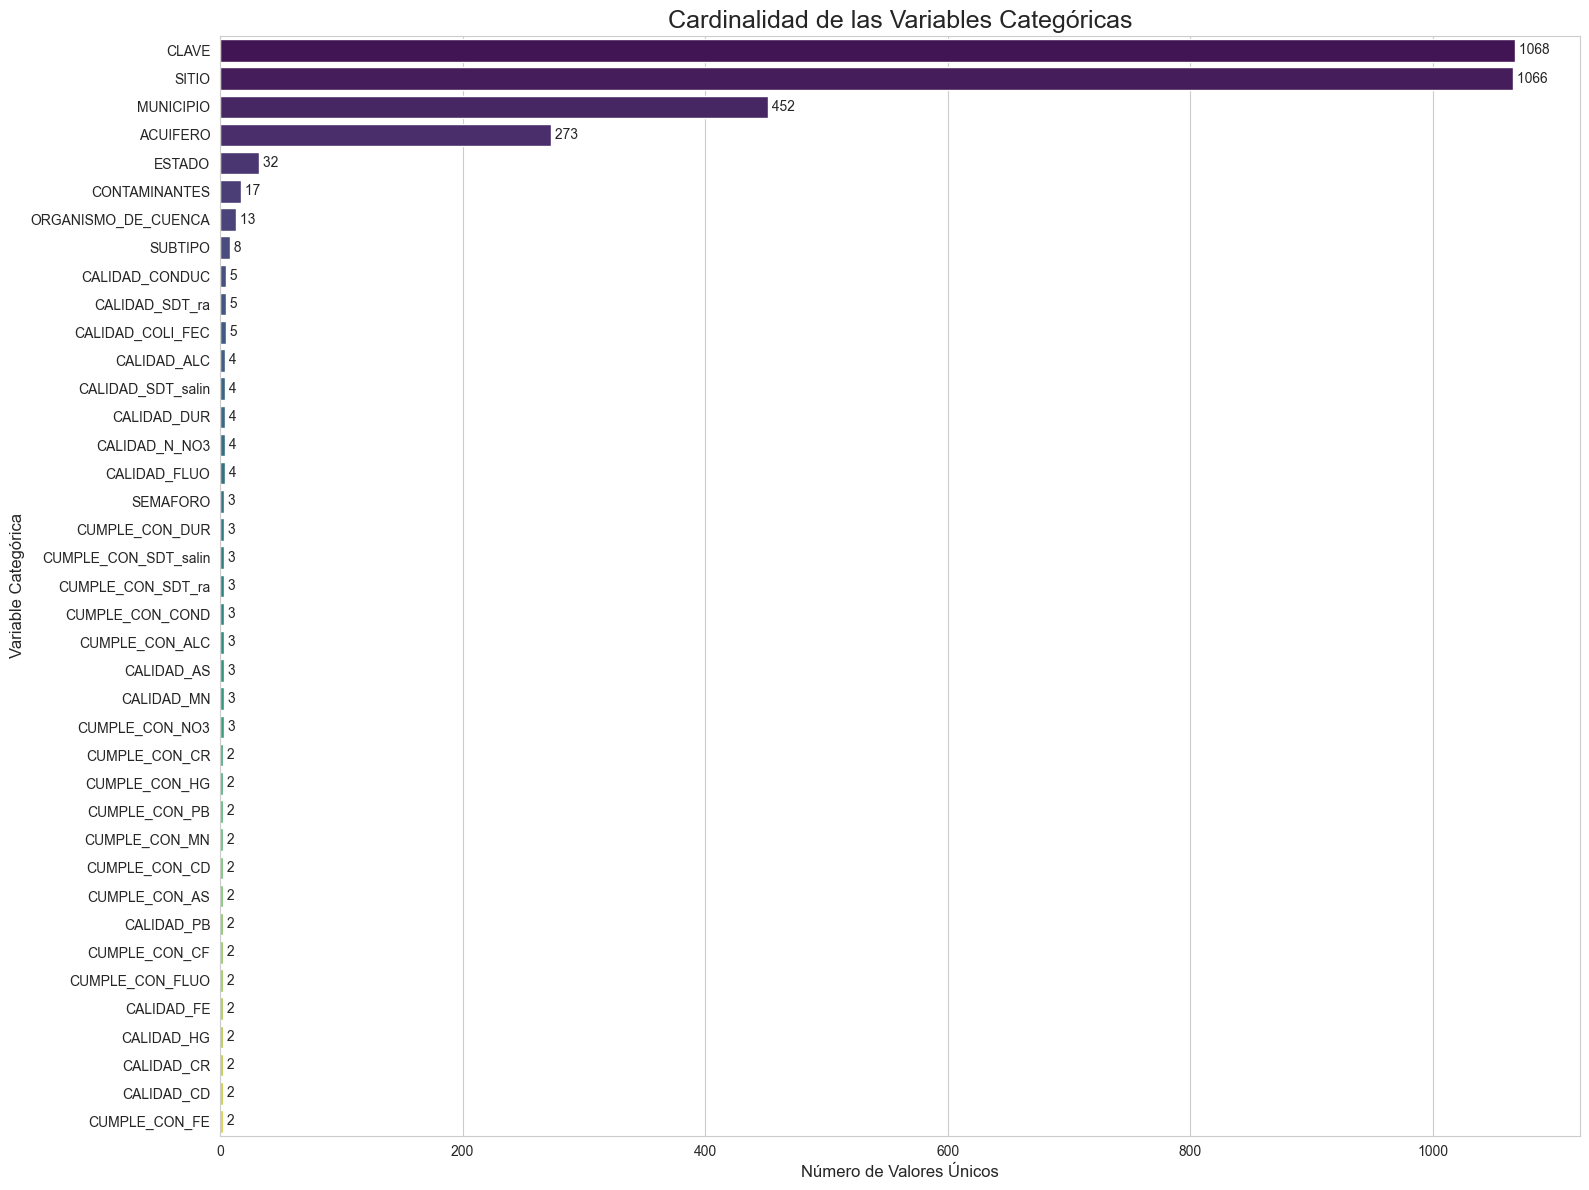

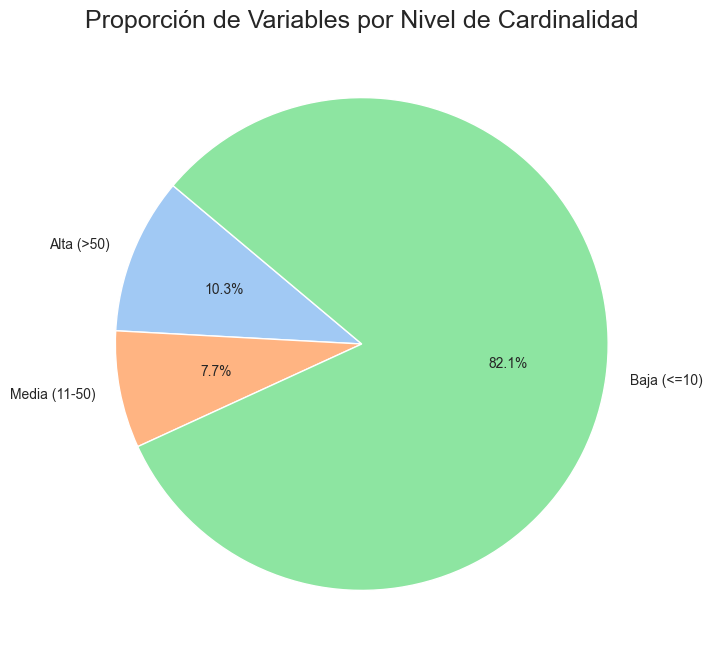


Número de etiquetas únicas (incluyendo 'Sin Contaminantes'): 17

--- Frecuencia de Cada Contaminante Individual (y Muestras Limpias) ---


,Contaminante,Frecuencia
0,Sin Contaminantes,434
1,Dureza Total,226
2,Fluoruros,192
3,Hierro,136
4,Arsénico,127
5,Conductividad,123
6,Manganeso,86
7,Nitratos,82
8,Sólidos Disueltos (Riego),71
9,Sólidos Disueltos (Salinidad),71


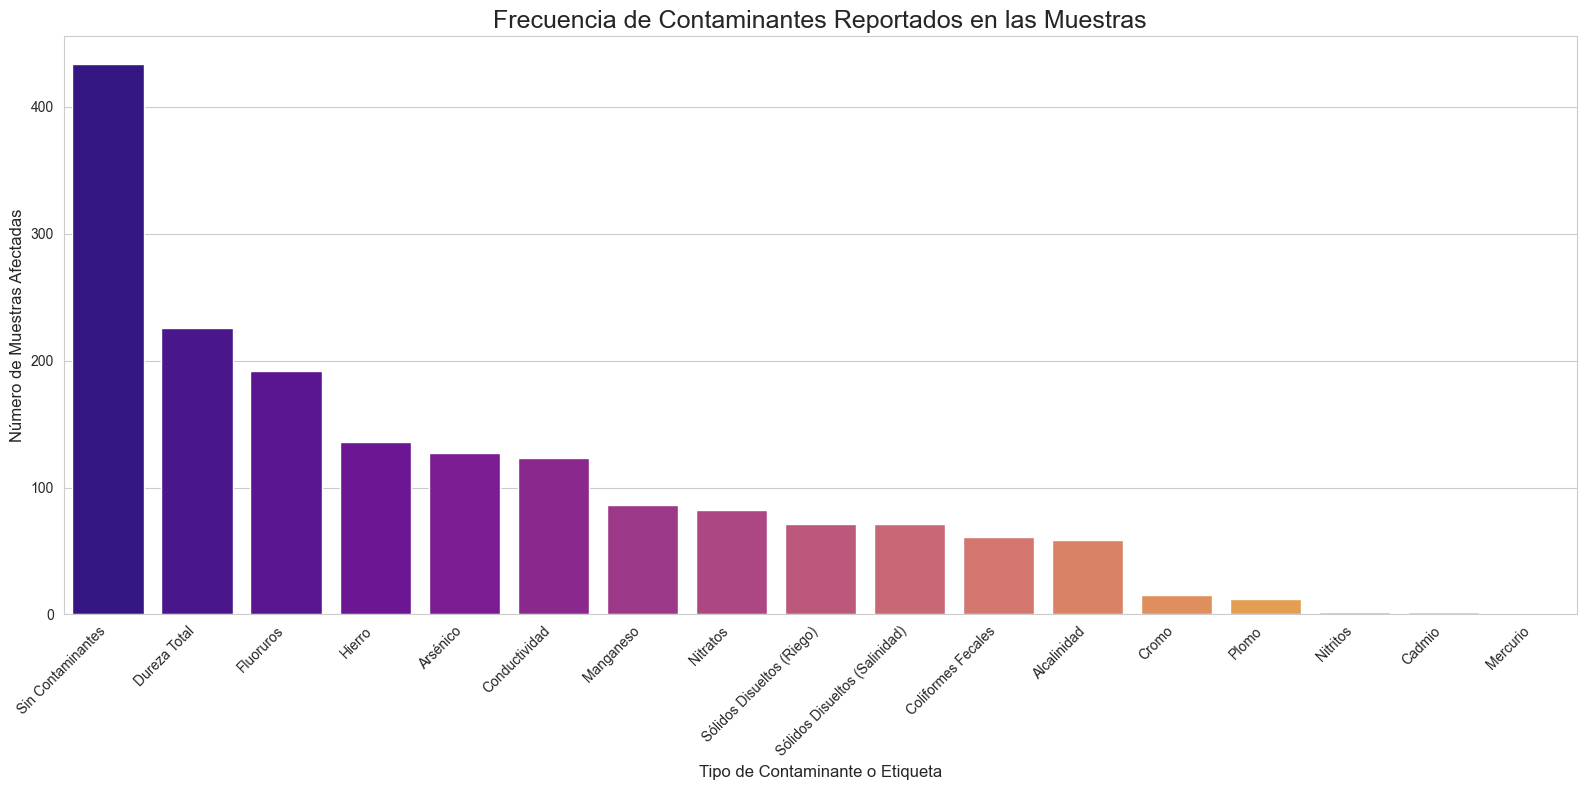


--- Resumen Detallado por Nivel de Cardinalidad ---

[+] Variables de ALTA CARDINALIDAD (> 50 valores únicos):
- CLAVE (Únicos: 1068)
- SITIO (Únicos: 1066)
- MUNICIPIO (Únicos: 452)
- ACUIFERO (Únicos: 273)

[~] Variables de CARDINALIDAD MEDIA (11-50 valores únicos):
- ESTADO (Únicos: 32)
- CONTAMINANTES (Únicos: 17)
- ORGANISMO_DE_CUENCA (Únicos: 13)

[-] Variables de BAJA CARDINALIDAD (<= 10 valores únicos):
- SUBTIPO (Únicos: 8)
- CALIDAD_CONDUC (Únicos: 5)
- CALIDAD_SDT_ra (Únicos: 5)
- CALIDAD_COLI_FEC (Únicos: 5)
- CALIDAD_ALC (Únicos: 4)
- CALIDAD_SDT_salin (Únicos: 4)
- CALIDAD_DUR (Únicos: 4)
- CALIDAD_N_NO3 (Únicos: 4)
- CALIDAD_FLUO (Únicos: 4)
- SEMAFORO (Únicos: 3)
- CUMPLE_CON_DUR (Únicos: 3)
- CUMPLE_CON_SDT_salin (Únicos: 3)
- CUMPLE_CON_SDT_ra (Únicos: 3)
- CUMPLE_CON_COND (Únicos: 3)
- CUMPLE_CON_ALC (Únicos: 3)
- CALIDAD_AS (Únicos: 3)
- CALIDAD_MN (Únicos: 3)
- CUMPLE_CON_NO3 (Únicos: 3)
- CUMPLE_CON_CR (Únicos: 2)
- CUMPLE_CON_HG (Únicos: 2)
- CUMPLE_CON_PB (Únic

In [4]:
# --- Sección 4.0: Análisis Profundo de Cardinalidad con Visualizaciones ---

if 'df_cleaned' in locals():
    # --- Parte 1: Análisis Detallado de la Columna 'CONTAMINANTES' ---
    print("\n--- Análisis Detallado de la Columna 'CONTAMINANTES' ---")
    
    # Diccionario para mapear abreviaturas a nombres completos y amigables
    contaminant_name_map = {
        'Sin Contaminantes': 'Sin Contaminantes', 'DT': 'Dureza Total', 'FLUO': 'Fluoruros',
        'AS': 'Arsénico', 'FE': 'Hierro', 'CF': 'Coliformes Fecales', 'NO3': 'Nitratos',
        'CONDUC': 'Conductividad', 'MN': 'Manganeso', 'SDT_ra': 'Sólidos Disueltos (Riego)',
        'SDT_salin': 'Sólidos Disueltos (Salinidad)', 'CR': 'Cromo', 'PB': 'Plomo',
        'NI': 'Nitritos', 'CD': 'Cadmio', 'HG': 'Mercurio', 'ALC': 'Alcalinidad'
    }

    # Procesar la Serie para extraer todos los contaminantes individuales
    all_contaminants_full = df_cleaned['CONTAMINANTES'].str.split(',').explode().str.strip().replace('', np.nan).dropna()
    contaminant_counts_full = all_contaminants_full.value_counts()
    
    # Crear el DataFrame para la tabla y mapear a nombres amigables
    contaminant_counts_full_df = contaminant_counts_full.reset_index()
    contaminant_counts_full_df.columns = ['Etiqueta_Corta', 'Frecuencia']
    contaminant_counts_full_df['Contaminante'] = contaminant_counts_full_df['Etiqueta_Corta'].map(contaminant_name_map).fillna(contaminant_counts_full_df['Etiqueta_Corta'])

    # --- Parte 2: Análisis General de Cardinalidad ---
    print("\n\n--- Análisis General de Cardinalidad ---")
    
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    cardinality_data = []
    for col in categorical_cols:
        if col == 'CONTAMINANTES':
            # Usar el conteo real de tipos de contaminantes
            num_unique = len(contaminant_counts_full)
        else:
            num_unique = df_cleaned[col].nunique()
        cardinality_data.append({'Columna': col, 'Valores Únicos (Cardinalidad)': num_unique})
    
    cardinality_df = pd.DataFrame(cardinality_data).sort_values(by='Valores Únicos (Cardinalidad)', ascending=False)

    # Visualización de Cardinalidad General
    plt.figure(figsize=(16, 12))
    sns.barplot(x='Valores Únicos (Cardinalidad)', y='Columna', data=cardinality_df, palette='viridis')
    plt.title('Cardinalidad de las Variables Categóricas', fontsize=18)
    plt.xlabel('Número de Valores Únicos', fontsize=12)
    plt.ylabel('Variable Categórica', fontsize=12)
    for index, value in enumerate(cardinality_df['Valores Únicos (Cardinalidad)']):
        plt.text(value, index, f' {value}', va='center')
    plt.tight_layout()
    plt.show()

    # Agrupar por nivel de cardinalidad
    low_cardinality_threshold = 10
    high_cardinality_threshold = 50
    low_card_count = (cardinality_df['Valores Únicos (Cardinalidad)'] <= low_cardinality_threshold).sum()
    high_card_count = (cardinality_df['Valores Únicos (Cardinalidad)'] > high_cardinality_threshold).sum()
    medium_card_count = len(cardinality_df) - low_card_count - high_card_count
    
    cardinality_summary = {'Nivel': ['Alta (>50)', 'Media (11-50)', 'Baja (<=10)'], 'Conteo': [high_card_count, medium_card_count, low_card_count]}
    plt.figure(figsize=(10, 8))
    plt.pie(cardinality_summary['Conteo'], labels=cardinality_summary['Nivel'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Proporción de Variables por Nivel de Cardinalidad', fontsize=18)
    plt.ylabel('')
    plt.show()
    
    print(f"\nNúmero de etiquetas únicas (incluyendo 'Sin Contaminantes'): {len(contaminant_counts_full)}")
    print("\n--- Frecuencia de Cada Contaminante Individual (y Muestras Limpias) ---")
    display(contaminant_counts_full_df[['Contaminante', 'Frecuencia']])

    # Visualización de Frecuencia de Contaminantes
    plt.figure(figsize=(16, 8))
    sns.barplot(x=contaminant_counts_full_df['Contaminante'], y=contaminant_counts_full_df['Frecuencia'], palette='plasma')
    plt.title('Frecuencia de Contaminantes Reportados en las Muestras', fontsize=18)
    plt.xlabel('Tipo de Contaminante o Etiqueta', fontsize=12)
    plt.ylabel('Número de Muestras Afectadas', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Resumen textual detallado
    print("\n--- Resumen Detallado por Nivel de Cardinalidad ---")
    
    print(f"\n[+] Variables de ALTA CARDINALIDAD (> {high_cardinality_threshold} valores únicos):")
    high_card_list = cardinality_df[cardinality_df['Valores Únicos (Cardinalidad)'] > high_cardinality_threshold]
    for _, row in high_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")
    
    print(f"\n[~] Variables de CARDINALIDAD MEDIA ({low_cardinality_threshold+1}-{high_cardinality_threshold} valores únicos):")
    medium_card_list = cardinality_df[
        (cardinality_df['Valores Únicos (Cardinalidad)'] > low_cardinality_threshold) &
        (cardinality_df['Valores Únicos (Cardinalidad)'] <= high_cardinality_threshold)
    ]
    for _, row in medium_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")

    print(f"\n[-] Variables de BAJA CARDINALIDAD (<= {low_cardinality_threshold} valores únicos):")
    low_card_list = cardinality_df[cardinality_df['Valores Únicos (Cardinalidad)'] <= low_cardinality_threshold]
    for _, row in low_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")

else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

--- Visualizando las Distribuciones de Variables Numéricas Clave ---


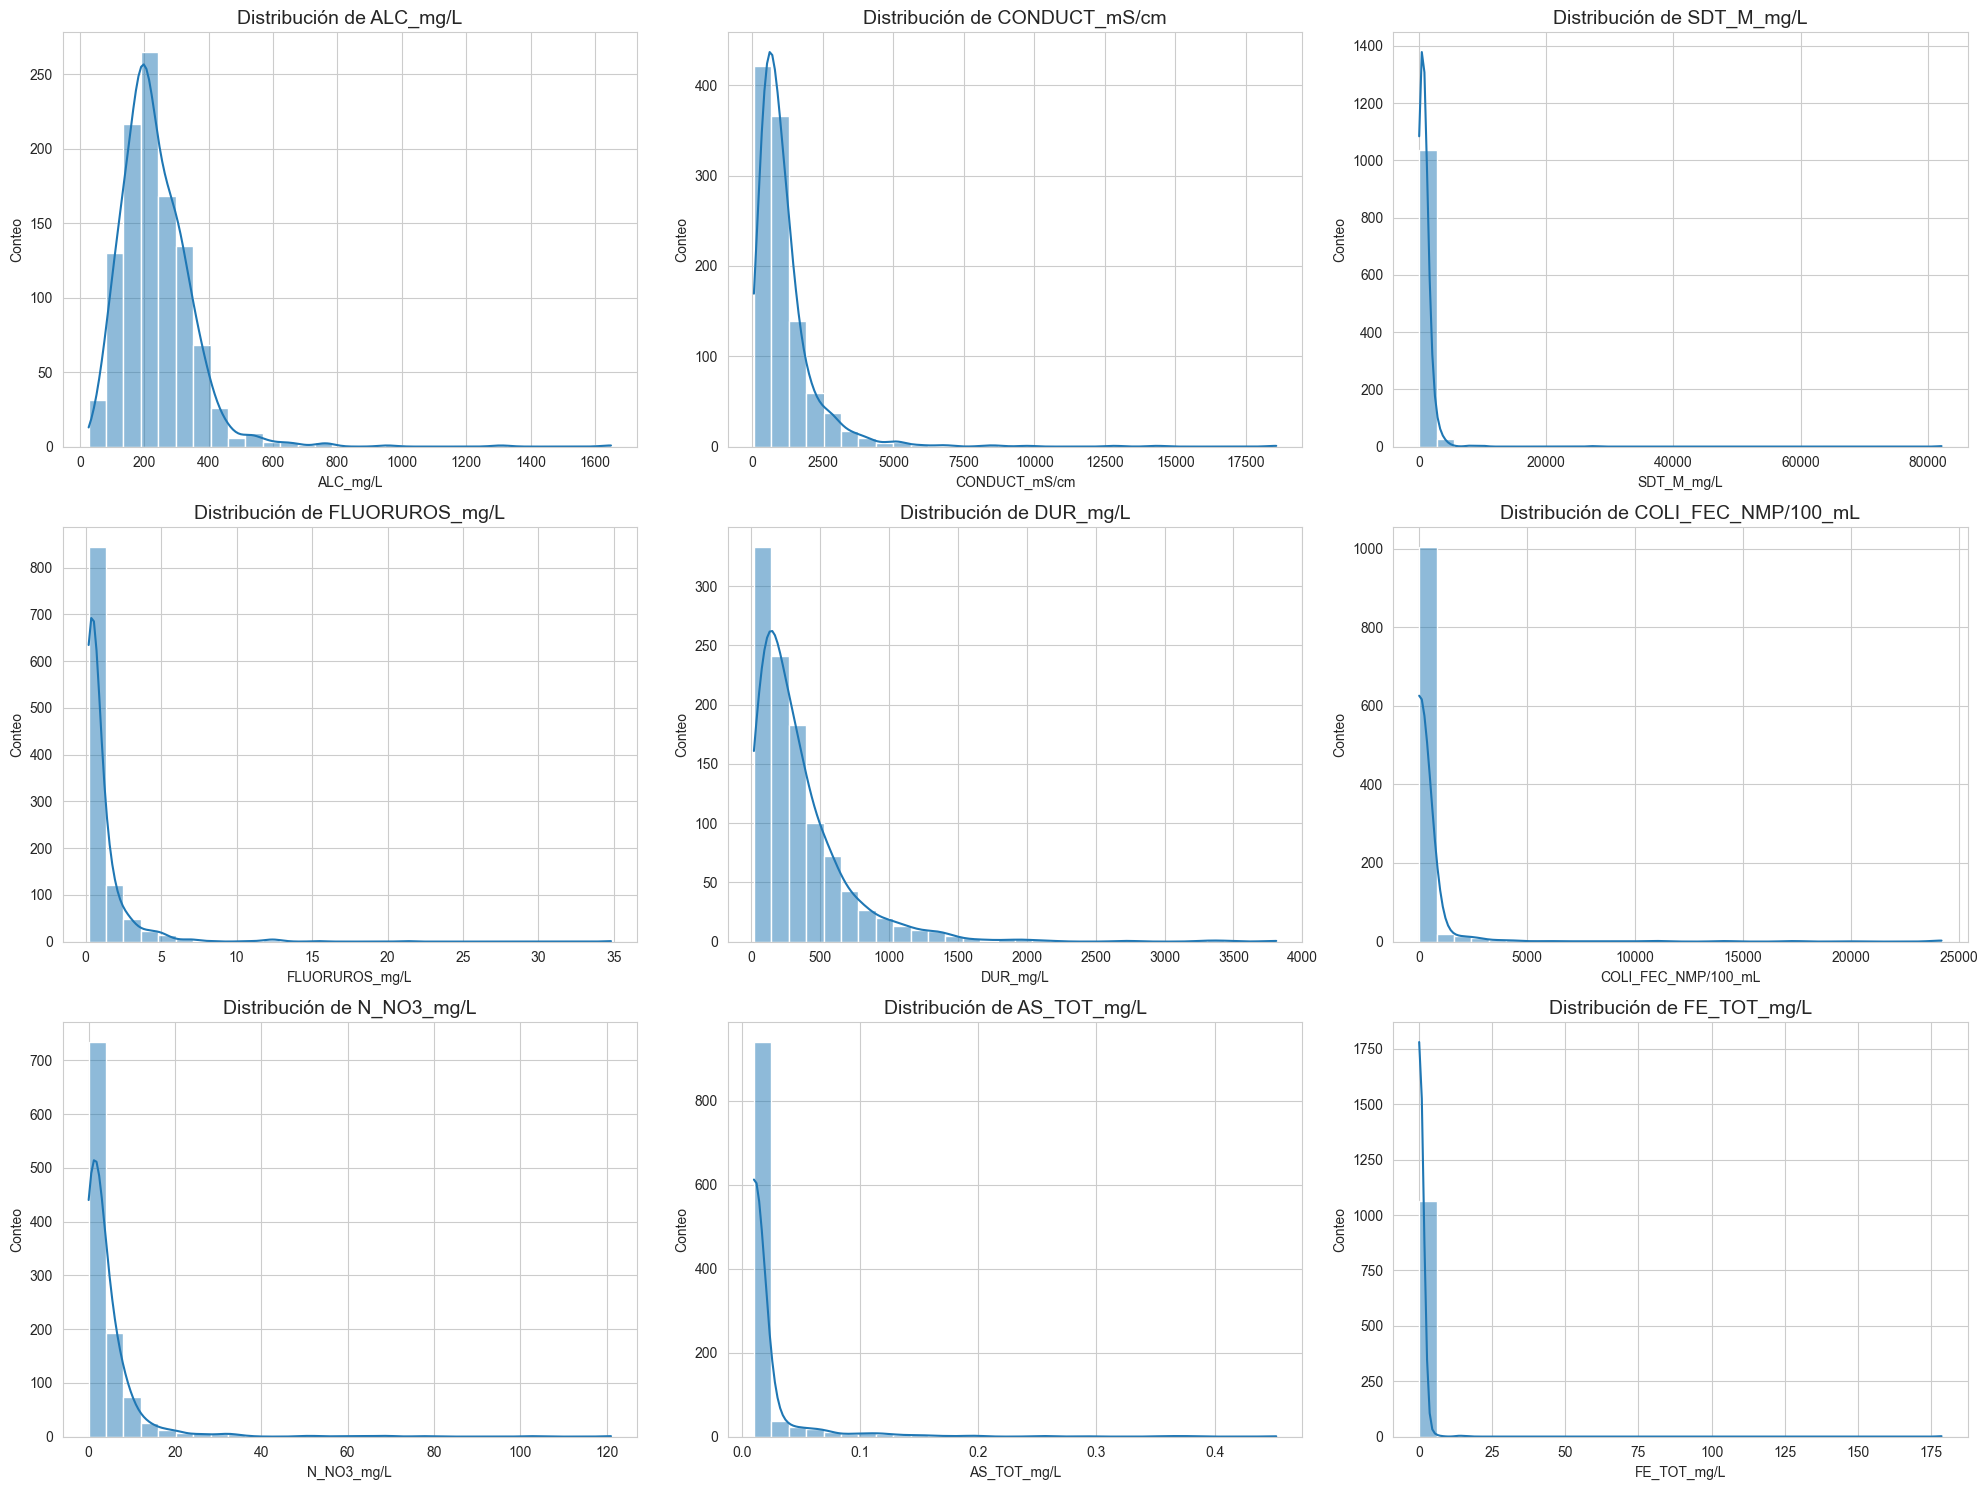


--- Visualizando las Distribuciones de Variables Categóricas Clave ---


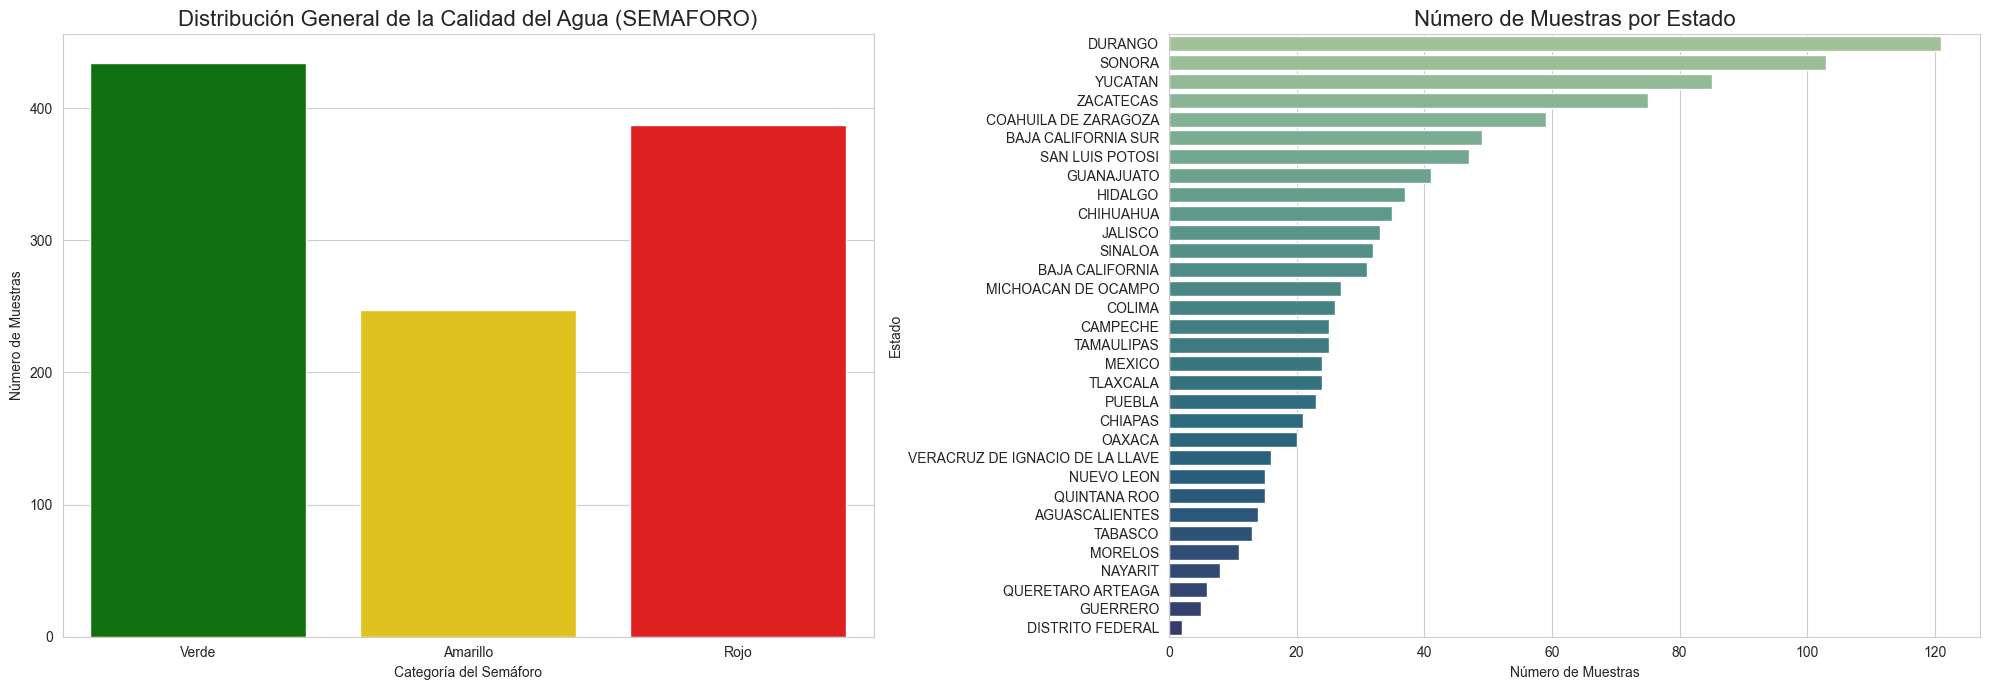

In [5]:
# --- Sección 4.1: Análisis Univariado (Variables Individuales) ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    # --- Distribuciones de Variables Numéricas Clave ---
    print("--- Visualizando las Distribuciones de Variables Numéricas Clave ---")
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    cols_to_plot = ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 
                    'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'FE_TOT_mg/L']
    
    for i, col in enumerate(cols_to_plot):
        if col in df_cleaned.columns:
            ax = axes.flatten()[i]
            sns.histplot(df_cleaned[col], kde=True, ax=ax, bins=30)
            ax.set_title(f'Distribución de {col}', fontsize=14)
            ax.set_xlabel(col) # Añadir etiqueta X para claridad
            ax.set_ylabel('Conteo') # Añadir etiqueta Y para claridad
    plt.tight_layout()
    plt.show()

    # --- Distribuciones de Variables Categóricas Clave ---
    print("\n--- Visualizando las Distribuciones de Variables Categóricas Clave ---")
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # Gráfico 1: Distribución del SEMAFORO
    color_map = {'Verde': 'green', 'Amarillo': 'gold', 'Rojo': 'red'}
    sns.countplot(x='SEMAFORO', data=df_cleaned, order=['Verde', 'Amarillo', 'Rojo'], palette=color_map, ax=axes[0])
    axes[0].set_title('Distribución General de la Calidad del Agua (SEMAFORO)', fontsize=16)
    axes[0].set_xlabel('Categoría del Semáforo')
    axes[0].set_ylabel('Número de Muestras')

    # Gráfico 2: Número de muestras por Estado
    sns.countplot(y='ESTADO', data=df_cleaned, order=df_cleaned['ESTADO'].value_counts().index, palette='crest', ax=axes[1])
    axes[1].set_title('Número de Muestras por Estado', fontsize=16)
    axes[1].set_xlabel('Número de Muestras')
    axes[1].set_ylabel('Estado')
    
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

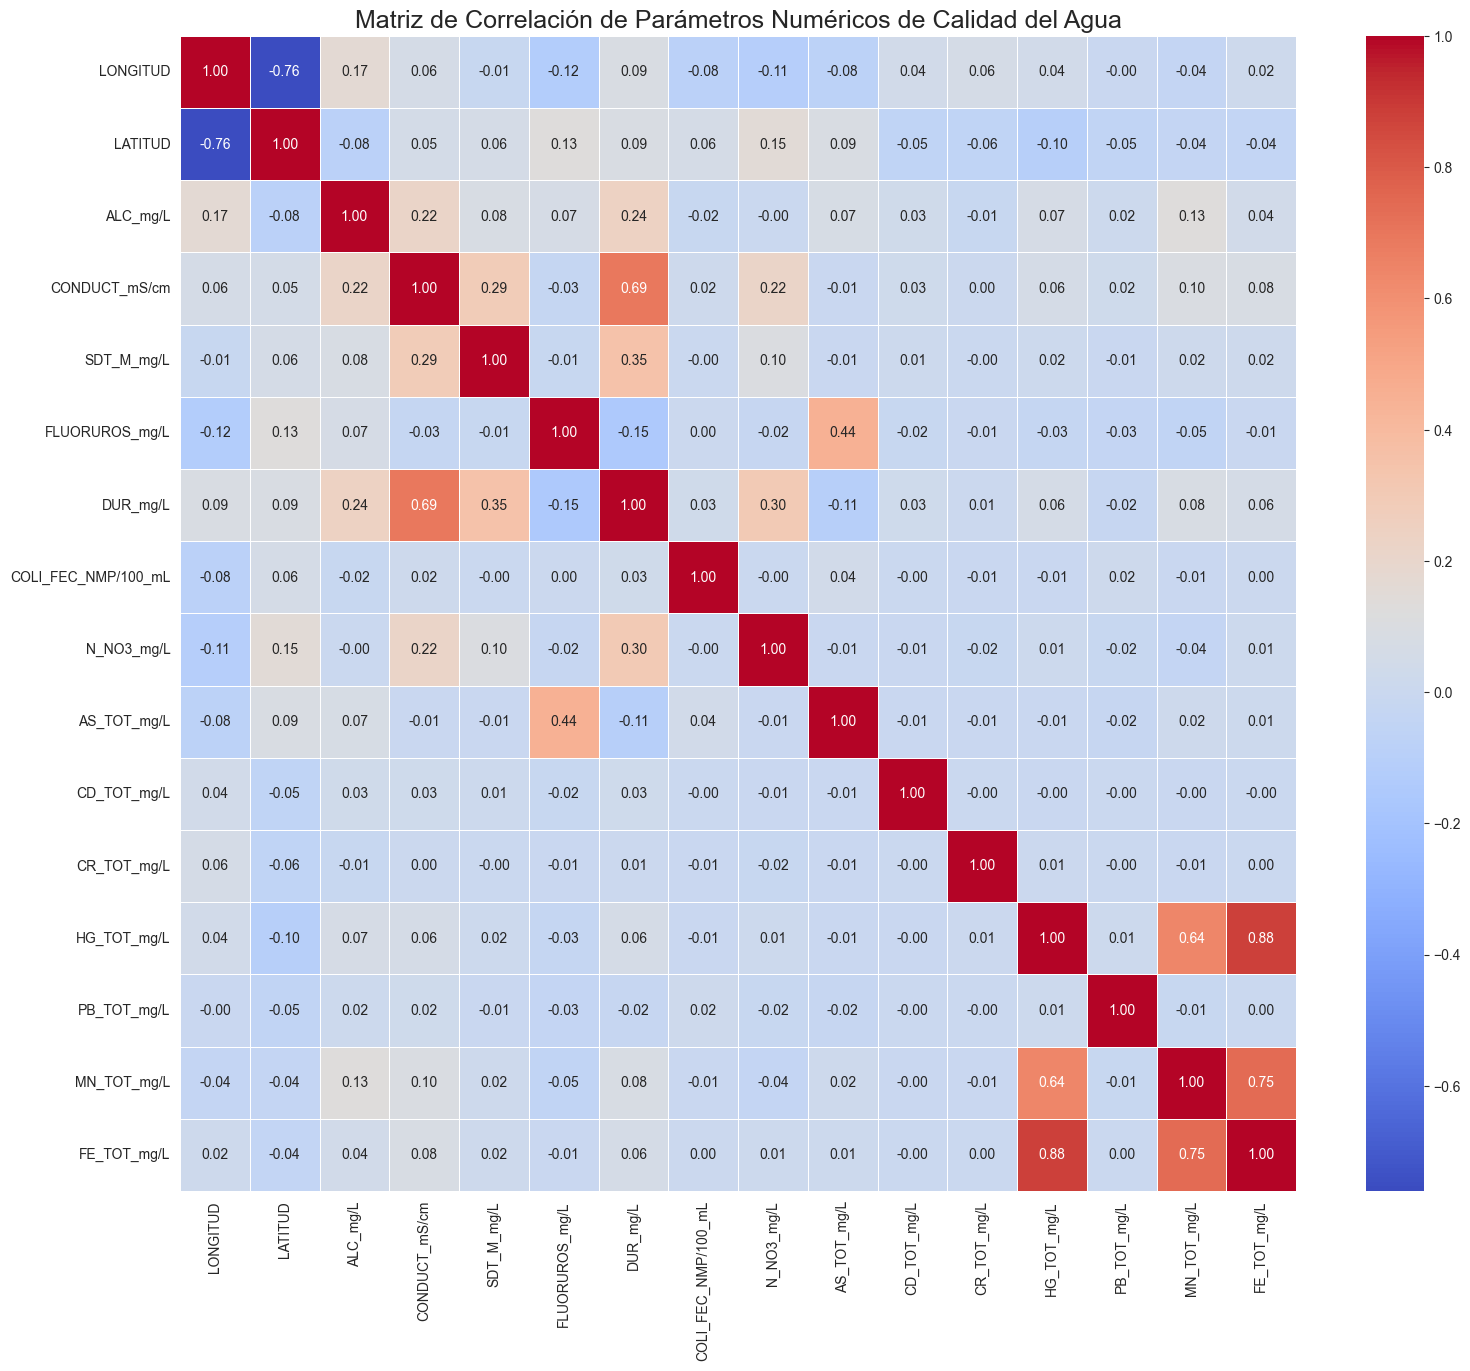

In [6]:
# --- Sección 4.2: Análisis Bivariado (Correlación entre Variables) ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    # Definir nuevamente la lista de columnas numéricas para la matriz de correlación
    numerical_cols = [
        'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 
        'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 
        'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]
    
    # Calcular la matriz de correlación de Pearson
    correlation_matrix = df_cleaned[numerical_cols].corr()

    # Graficar el mapa de calor (heatmap)
    plt.figure(figsize=(18, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Matriz de Correlación de Parámetros Numéricos de Calidad del Agua', fontsize=18)
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

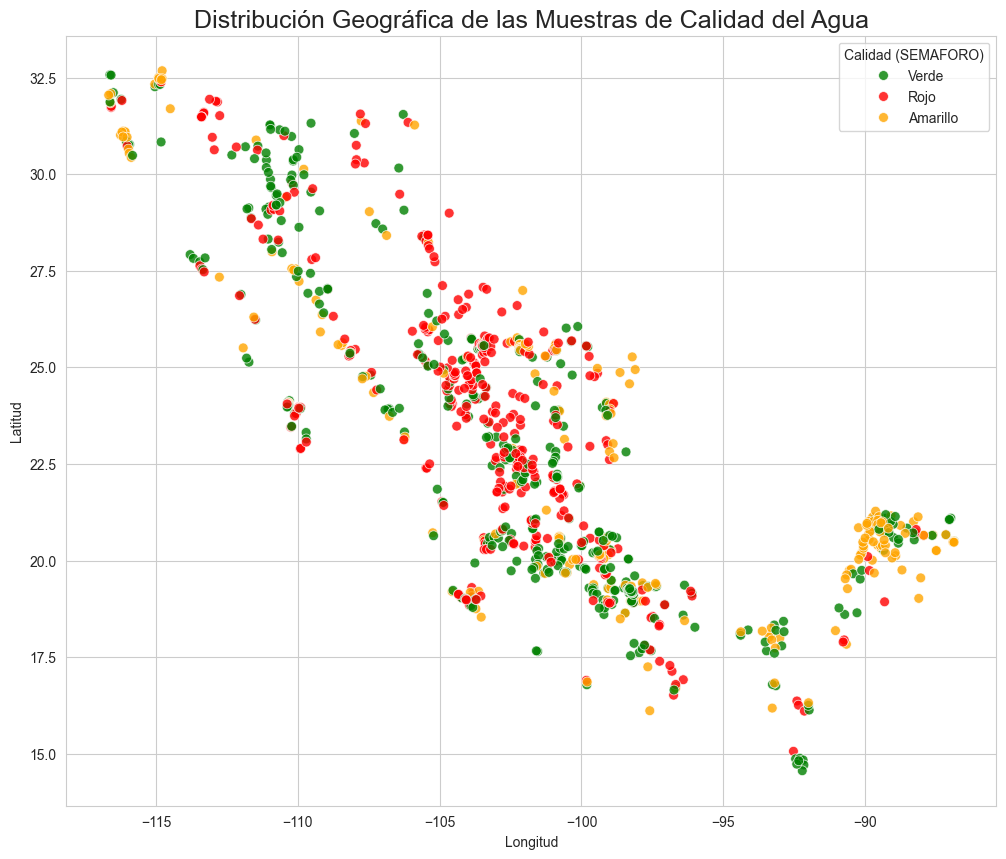

In [7]:
# --- Sección 4.3: Análisis Geoespacial ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='LONGITUD', 
        y='LATITUD', 
        hue='SEMAFORO',
        palette={'Verde': 'green', 'Amarillo': 'orange', 'Rojo': 'red'},
        data=df_cleaned,
        alpha=0.8,
        s=50  # Tamaño de los puntos
    )
    plt.title('Distribución Geográfica de las Muestras de Calidad del Agua', fontsize=18)
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Calidad (SEMAFORO)')
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

## Sección 5: Ingeniería y Selección de Características (Feature Engineering)

### Resumen Ejecutivo de la Fase

Esta fase detalla la construcción del conjunto de características para el modelo de clustering. El objetivo fue transformar los datos limpios en un espacio de características numéricamente estable y optimizado que maximice la capacidad del algoritmo K-Means para descubrir una estructura de agrupamiento significativa y con validez en el dominio del problema.

La estrategia adoptada es un **pipeline secuencial y justificado**, donde cada operación (transformación, escalado, selección) aborda un problema específico identificado en el EDA. Lejos de evitar la complejidad, el enfoque busca gestionarla estratégicamente, priorizando la creación de un **modelo base robusto y directamente interpretable**, sobre el cual se podrían construir iteraciones más complejas si el análisis lo requiriera. Cada decisión se fundamenta no solo en la teoría estadística, sino también en las implicaciones prácticas para la interpretabilidad y accionabilidad del resultado final.

---

### 1. Evaluación y Exclusión de Variables Categóricas

**Decisión Estratégica:** **Excluir todas las variables categóricas del espacio de características del modelo de clustering.**

**Justificación:**

*   **Inviabilidad por Alta Cardinalidad:** Variables como `CLAVE`, `SITIO`, `MUNICIPIO` y `ACUIFERO` exhiben una cardinalidad extremadamente alta (de 273 a 1068). Su codificación (ej. *One-Hot Encoding*) provocaría una explosión del espacio de características, añadiendo cientos de columnas dispersas. Esto no solo es computacionalmente ineficiente, sino que degrada severamente el concepto de distancia euclidiana en altas dimensiones (la "maldición de la dimensionalidad"), haciendo que el algoritmo K-Means sea ineficaz para encontrar una estructura de clusters coherente.

*   **Representación Espacial Subóptima:** Las variables geográficas categóricas (`MUNICIPIO`, `ACUIFERO`, `ESTADO`) son discretizaciones de un fenómeno continuo: la ubicación. Se podría argumentar que estas variables contienen información geológica valiosa que las coordenadas por sí solas no capturan. Sin embargo, para un algoritmo basado en distancia como K-Means, su alta cardinalidad las convierte en características intratables. Por lo tanto, se optó por una estrategia más robusta: utilizar las coordenadas **`LONGITUD` y `LATITUD`** como la representación espacial primaria, ya que son métricamente superiores y más fundamentales. Las variables categóricas como `ACUIFERO` no se descartan, sino que se reservan para una fase posterior de **validación y enriquecimiento**, donde se analizará la composición de acuíferos dentro de cada cluster para confirmar si el modelo ha logrado separar grupos geológicamente distintos. Así, `ACUIFERO` pasa de ser una característica de entrenamiento ruidosa a una valiosa herramienta de validación.

*   **Prevención de Razonamiento Circular (Fuga de Información):** Las variables restantes (`CONTAMINANTES`, `CALIDAD_*`, `CUMPLE_CON_*`) no son características predictivas, sino **etiquetas derivadas**; son el **resultado** de aplicar reglas de negocio a las mediciones, no la **causa** de las mismas. Incluirlas en el entrenamiento constituiría una fuga de información. El modelo, en lugar de descubrir los patrones subycentes en los datos brutos, simplemente aprendería a replicar estas reglas predefinidas. Por esta misma razón fundamental, la **Discretización o Binning** de nuestras características numéricas fue descartada, ya que es funcionalmente equivalente a reintroducir estas etiquetas derivadas.

---

### 2. Generación de Nuevas Características

**Decisión Estratégica:** **No generar nuevas características para el *modelo base*.** La generación de características se reserva como una técnica avanzada para una **segunda fase iterativa**, si el modelo base demuestra ser insuficiente.

**Justificación:**

Esta decisión no busca evitar la complejidad, sino gestionarla de manera estratégica para asegurar la validez, causalidad y defensibilidad del modelo. Se reconoce plenamente que en la hidrogeoquímica, las características generadas (ej. Ratios Iónicos, Índice de Adsorción de Sodio - SAR) son herramientas de diagnóstico estándar y potentes. La pregunta no es si son útiles, sino *cuándo* y *cómo* deben ser introducidas en el pipeline de modelado.

1.  **Establecimiento de un Benchmark Causal y Falsificable:** Es metodológicamente imperativo construir primero un modelo que segmente los datos basándose exclusivamente en las **mediciones primarias y directas**. Esto crea un benchmark donde la relación entre las características y los clusters es directa (ej. "este cluster se define por un alto nivel de Arsénico"). Este modelo base es **falsificable**: podemos evaluar claramente su rendimiento y determinar si es suficiente. Si introdujéramos desde el inicio características compuestas (ej. SAR, que es una función de `Na`, `Ca`, y `Mg`), crearíamos un modelo donde las variables de entrada están matemáticamente entrelazadas. Si ese modelo falla, sería imposible saber si el fallo se debe a las mediciones primarias o a la forma en que el índice compuesto está confundiendo o enmascarando las señales individuales.

2.  **Probando la Capacidad del Algoritmo:** Una pregunta analítica clave es: ¿Puede el algoritmo K-Means, operando en el espacio n-dimensional de los iones crudos, *descubrir por sí mismo* los agrupamientos que corresponden a conceptos de dominio conocidos como "intrusión salina" o "alto riesgo de sodificación"? Al ejecutar el modelo base primero, podemos responder a esta pregunta. Si el modelo logra separar estos grupos de forma natural, demuestra la robustez de la estructura lineal en los datos. Si falla, nos proporciona una **justificación irrefutable para introducir una característica de ingeniería específica (ej. `SAR` o `Na/Cl`) en una segunda iteración**, porque hemos *probado* que añade información no lineal que el modelo base no pudo capturar.

3.  **Construcción de un "Glass Box" Iterativo:** El enfoque por etapas transforma el modelado de una "caja negra" a una "caja de cristal" que se construye progresivamente. El modelo base es transparente. Cada nueva característica añadida en una fase posterior tiene un propósito claro (ej. "se añadió el SAR para intentar separar mejor los clusters 4 y 7, que el modelo base confundió"). Esto permite construir una narrativa analítica en la que cada pieza de complejidad está justificada por una necesidad demostrada, lo cual es fundamental para la confianza y la adopción de los resultados por parte de expertos en el dominio.

En resumen, diferir la generación de características no es un acto de simplificación, sino una decisión estratégica para asegurar un **análisis riguroso, causal y defendible**, donde la complejidad se añade de manera deliberada y basada en evidencia.

---

### 3. Transformación de Características

**Decisión Estratégica:** **Aplicar una Transformación Logarítmica (`np.log1p`)** a todas las variables de medición.

**Justificación:**

*   **Necesidad Estadística:** El EDA demostró un **sesgo positivo extremo** en las distribuciones, una violación directa de las condiciones ideales para K-Means. La transformación es un paso estadísticamente necesario para mejorar la simetría de las distribuciones y la estabilidad del modelo.
*   **Selección Óptima para la Interpretabilidad Inversa:** Se consideraron transformaciones más potentes y adaptativas como Box-Cox o Yeo-Johnson. Estadísticamente, estas podrían encontrar una potencia `lambda` óptima para normalizar cada variable de forma individual. Sin embargo, esta optimización introduce una complejidad significativa en el paso más importante del proyecto: la interpretación de los centroides. Para revertir la transformación, se requeriría una función inversa única y matemáticamente más compleja para cada una de las 13 variables. La transformación logarítmica, por otro lado, es altamente efectiva para el tipo de sesgo observado y posee una **inversa simple y universal (la función exponencial)**. Por lo tanto, se eligió conscientemente la solución que maximiza tanto la mejora estadística como la **interpretabilidad y reproducibilidad** del resultado final.

---

### 4. Escalamiento de Características

**Decisión Estratégica:** **Aplicar Estandarización (`StandardScaler`)** después de la transformación.

**Justificación:**

*   **Necesidad Imperativa:** El escalado es obligatorio para que las variables, que operan en órdenes de magnitud diferentes, contribuyan de manera equitativa al cálculo de la distancia euclidiana. Sin este paso, el modelo estaría dominado por las variables con mayor rango numérico.
*   **Robustez del Pipeline Combinado:** La elección de `StandardScaler` sobre alternativas más resistentes a outliers como `RobustScaler` está justificada por el orden de las operaciones en nuestro pipeline. La **transformación logarítmica es nuestra herramienta principal y más potente para manejar outliers**, ya que ataca la raíz del problema (el sesgo de la distribución). Una vez que los datos han sido transformados y su distribución simetrizada, `StandardScaler` no solo es adecuado, sino preferible, ya que utiliza toda la información de la varianza (ahora no distorsionada) para estandarizar, a diferencia de `RobustScaler` que solo utiliza el rango intercuartílico. Este pipeline de **Transformación + Estandarización** es más robusto que aplicar un escalador robusto a datos sin transformar.

---

### 5. Selección de Características por Filtrado

**Decisión Estratégica:** **Utilizar un filtro por Correlación para eliminar redundancia directa y considerar (pero rechazar para el modelo base) métodos de extracción como PCA.**

**Justificación:**

*   **Filtro de Correlación (Aplicado):** Se aplicó de manera quirúrgica para eliminar una **redundancia física directa**. Se eliminó `SDT_M_mg/L` debido a su correlación de `0.88` con `CONDUCT_mS/cm` porque son dos medidas del mismo fenómeno. No se usó un umbral arbitrario, preservando así otras correlaciones moderadas entre variables físicamente distintas (ej. `Dureza` y `Conductividad`) para mantener la riqueza descriptiva.

*   **Umbral de Varianza (Rechazado):** Fue descartado por ser demasiado riesgoso en este contexto. En análisis de contaminantes, una característica con baja varianza general (ej. un metal pesado presente en solo el 1% de las muestras) puede ser de **importancia crítica** para identificar clusters de alto riesgo. Un filtro de varianza la eliminaría erróneamente. El escalado ya se encarga de que estas variables no sean ignoradas por su pequeña escala.

*   **Métodos Supervisados (Chi-cuadrado, ANOVA) (Rechazados):** Fueron descartados por ser **metodológicamente inválidos** para un problema de clustering no supervisado, ya que requieren una variable objetivo que no existe.

*   **Extracción de Características (PCA) (Diferido):** Se consideró el uso de PCA para reducir la dimensionalidad de 15 características. La ventaja sería la creación de componentes ortogonales que capturan la máxima varianza, potencialmente reduciendo el ruido y mejorando la separación matemática de los clusters. Sin embargo, esta técnica fue **diferida a una posible segunda fase** por una razón estratégica fundamental:
    *   **Pérdida de la Interpretabilidad Directa:** PCA transforma las 15 mediciones originales en un nuevo conjunto de características abstractas ("Componente Principal 1", "Componente Principal 2", etc.). Interpretar un centroide definido por `PC1 = 2.5` y `PC2 = -1.2` es imposible sin un complejo proceso de retro-análisis de los "loadings" de cada componente.
    *   **Estrategia Iterativa:** Al igual que con la generación de características, el enfoque más riguroso es primero establecer un **benchmark con las características originales e interpretables**. Si este modelo base muestra signos de inestabilidad o ruido debido a la dimensionalidad, se justifica plenamente una segunda iteración usando PCA, donde el esfuerzo adicional para "traducir" los componentes principales de vuelta a insights del dominio estaría justificado por una mejora demostrable en el rendimiento del modelo.

---

### 6. Conclusiones de la Fase de Preparación de los Datos

La fase de Ingeniería y Selección de Características ha culminado con la creación de un conjunto de datos, `X_scaled`, meticulosamente preparado para el modelado de clustering. Cada decisión tomada ha sido el resultado de un análisis riguroso, balanceando la optimización estadística con la necesidad de interpretabilidad y la robustez del análisis.

Las conclusiones clave de esta fase son:

1.  **Se ha construido un Espacio de Características Óptimo para el Modelo Base:** El conjunto de datos final consta de **15 características numéricas continuas**. Este conjunto es óptimo porque:
    *   **Es Informativo:** Conserva todas las mediciones primarias directas, preservando la máxima granularidad de la información.
    *   **Es Eficiente:** Se ha eliminado la redundancia directa (`SDT_M_mg/L`) y se han excluido características categóricas intratables (`ACUIFERO`, `MUNICIPIO`) o que inducirían un razonamiento circular (`CALIDAD_*`).
    *   **Es Espacialmente Consciente:** Incluye las coordenadas geográficas como la representación más fundamental de la ubicación.

2.  **Los Datos Han Sido Estabilizados Numéricamente:** El pipeline secuencial de **Transformación Logarítmica seguido de Estandarización** ha abordado exitosamente los dos principales desafíos numéricos identificados en el EDA:
    *   La **transformación** ha corregido el sesgo extremo de las distribuciones, mitigando la influencia desproporcionada de los outliers.
    *   El **escalado** ha normalizado el rango de todas las variables, garantizando que cada una contribuirá de manera equitativa al cálculo de distancias del modelo.

3.  **La Estrategia de Modelado Iterativo ha sido Justificada:** Se ha tomado la decisión estratégica de **diferir técnicas más complejas** como la generación de características avanzadas (ratios, índices) y la extracción de características (PCA) a una posible segunda fase. Esta decisión no se basa en evitar la complejidad, sino en un enfoque metodológico riguroso que prioriza:
    *   **Establecer un benchmark causal e interpretable.**
    *   **Probar la capacidad del algoritmo** para descubrir patrones sin ayuda explícita.
    *   **Añadir complejidad solo cuando esté justificada** por una deficiencia demostrada en el modelo base.

En resumen, la preparación de los datos ha sido un proceso deliberado y multifacético. El resultado, `X_scaled`, no es simplemente una versión "limpia" de los datos originales, sino un producto de ingeniería diseñado específicamente para maximizar las probabilidades de éxito del algoritmo K-Means en la siguiente fase: el descubrimiento de patrones significativos y accionables en la calidad del agua subterránea.

In [8]:
# --- Sección 5: Ingeniería de Características y Preparación Final del Modelo ---

from sklearn.preprocessing import StandardScaler

if 'df_cleaned' in locals() and df_cleaned is not None:
    # --- 1. Selección de Características ---
    # Se elimina SDT_M_mg/L debido a su alta correlación con CONDUCT_mS/cm.
    features_for_clustering = [
        'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'FLUORUROS_mg/L', 
        'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 
        'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 
        'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]
    df_model = df_cleaned[features_for_clustering].copy()

    # --- 2. Transformación de Datos (Logarítmica) ---
    # No transformamos Latitud y Longitud ya que no presentan el mismo tipo de sesgo.
    cols_to_transform = [col for col in features_for_clustering if col not in ['LONGITUD', 'LATITUD']]
    
    print("Aplicando transformación logarítmica a las características sesgadas...")
    for col in cols_to_transform:
        df_model[col] = np.log1p(df_model[col])
    
    print("\n--- Datos después de la Transformación Logarítmica (primeras 5 filas) ---")
    display(df_model.head())

    # --- 3. Escalado de Características ---
    print("\nEscalando todas las características con StandardScaler...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_model)
    
    print(f"\nDimensiones de los datos finales escalados para el clustering: {X_scaled.shape}")
    print("Los datos están ahora completamente preprocesados y listos para los algoritmos de clustering.")

else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

Aplicando transformación logarítmica a las características sesgadas...

--- Datos después de la Transformación Logarítmica (primeras 5 filas) ---


,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,5.442374,6.846943,0.681378,5.369391,0.741937,1.645703,0.015972,0.002996,0.004988,0.0005,0.004988,0.001499,0.085352
1,-102.20075,21.99958,5.450996,6.411818,0.657416,5.226023,0.741937,1.909559,0.013311,0.002996,0.004988,0.0005,0.004988,0.001499,0.024693
2,-102.28801,22.36685,5.327488,6.278521,1.031225,4.801715,0.741937,0.896008,0.036332,0.002996,0.004988,0.0005,0.004988,0.001499,0.024693
3,-102.29449,22.18435,5.793014,6.532334,0.752783,5.302703,0.741937,0.814744,0.015283,0.002996,0.004988,0.0005,0.004988,0.001499,0.024693
4,-110.24480,23.45138,5.739423,7.518607,0.210504,6.169584,5.676754,2.813746,0.009950,0.002996,0.004988,0.0005,0.004988,0.001499,0.024693



Escalando todas las características con StandardScaler...

Dimensiones de los datos finales escalados para el clustering: (1068, 15)
Los datos están ahora completamente preprocesados y listos para los algoritmos de clustering.


### Sección 6: Determinación del Número Óptimo de Clusters (k) y Entrenamiento del Modelo Final

#### Resumen Ejecutivo de la Sección

El objetivo de esta sección fue determinar el número óptimo de clusters, `k`, para el algoritmo K-Means y entrenar el modelo final. Se emplearon dos técnicas de diagnóstico (Método del Codo y Puntuación de Silueta) y se realizó un análisis de la distribución de las muestras para tomar una decisión informada y robusta.

#### Metodología y Ejecución

Se entrenaron modelos K-Means iterativamente para un rango de `k` de 2 a 15, evaluando la inercia y la Puntuación de Silueta para cada `k`. Adicionalmente, se entrenaron modelos exploratorios con los candidatos principales (`k=5` y `k=11`) para analizar la distribución del tamaño de los clusters resultantes.

#### Análisis de Resultados

1.  **Análisis del Método del Codo:** La gráfica de inercia mostró una pronunciada caída inicial que comenzó a aplanarse notablemente alrededor de **k=5 y k=6**. Esto sugiere que una solución con un número bajo de clusters amplios podría ser razonable.

2.  **Análisis de la Puntuación de Silueta:** Esta métrica cuantitativa proporcionó una guía más definitiva, alcanzando su **máximo global inequívoco en k=11** (score ≈ 0.182). Este pico indica que la mejor separabilidad matemática de los grupos se logra con una partición más granular.

3.  **Análisis de Tamaño de Clusters y Detección de Outliers:** Al entrenar modelos con `k=5` y `k=11`, se observó un patrón revelador:
    *   Con `k=5`, el modelo creó un **cluster "singleton"** (con un solo miembro), aislando el outlier más extremo del conjunto de datos.
    *   Con `k=11`, el modelo fue capaz de identificar y aislar **tres clusters singleton** y otro cluster muy pequeño (4 miembros).

    Este comportamiento confirma la presencia de múltiples outliers extremos en los datos. El valor de `k` más alto (11) permite al algoritmo aislar estas anomalías de manera más efectiva, lo que a su vez permite un análisis más claro de los patrones principales en el resto de los datos. Este fenómeno también explica por qué la Puntuación de Silueta (sensible a la buena separación) favoreció un `k` más alto.

#### Conclusión de la Sección y Decisión Final

Al sintetizar los tres análisis, se obtiene una visión completa. Mientras el Método del Codo sugiere una solución simple (k≈5-6), tanto la Puntuación de Silueta como el análisis de la distribución de clusters demuestran que una solución más granular (k=11) es superior. Esta última no solo es matemáticamente óptima, sino que también tiene la capacidad de **identificar y aislar eficazmente las muestras más anómalas** del conjunto de datos.

**Decisión:** Se seleccionará **k=11** como el número óptimo de clusters para el modelo final. Esta decisión se fundamenta en la evidencia cuantitativa de la Puntuáción de Silueta y se ve reforzada por la capacidad demostrada del modelo para gestionar y separar outliers, lo que permitirá una caracterización más precisa y detallada de los perfiles de calidad del agua.

Calculando la inercia para un rango de valores de k...


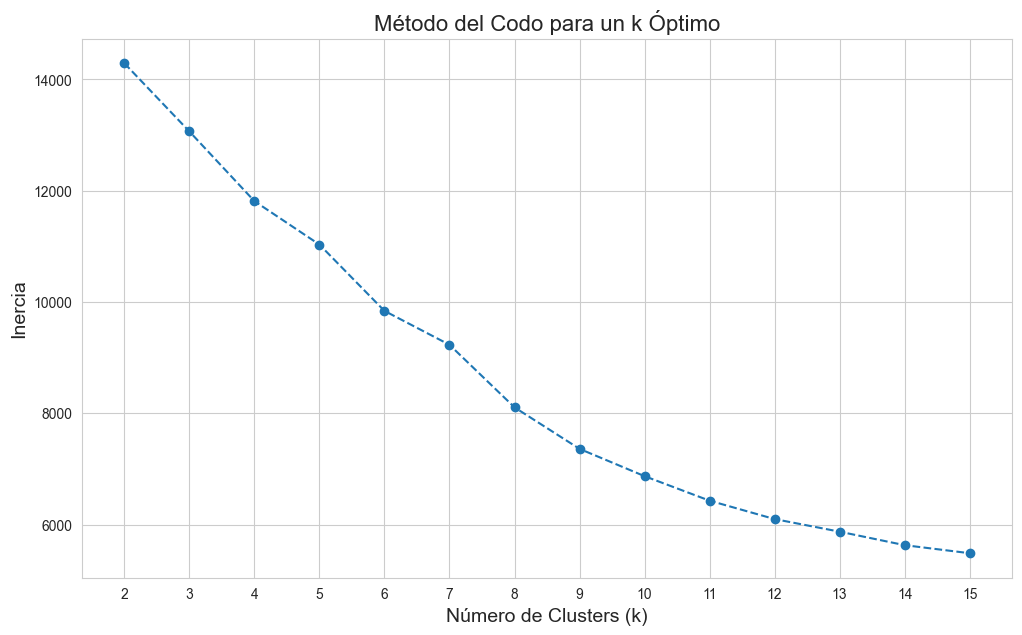

In [9]:
# --- Sección 6.1: Determinación del Número Óptimo de Clusters (k) ---

# --- Parte 1: Método del Codo (Elbow Method) ---

from sklearn.cluster import KMeans

# Asegurarse de que el dataset X_scaled de los pasos anteriores está disponible
if 'X_scaled' in locals():
    inertia = []
    k_range = range(2, 16) # Probaremos valores de k desde 2 hasta 15 clusters

    print("Calculando la inercia para un rango de valores de k...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Graficar los resultados del Método del Codo
    plt.figure(figsize=(12, 7))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Número de Clusters (k)', fontsize=14)
    plt.ylabel('Inercia', fontsize=14)
    plt.title('Método del Codo para un k Óptimo', fontsize=16)
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("Error: El dataset escalado 'X_scaled' no fue encontrado. Por favor, ejecuta los pasos de preprocesamiento anteriores.")

Calculando la Puntuación de Silueta para un rango de valores de k...


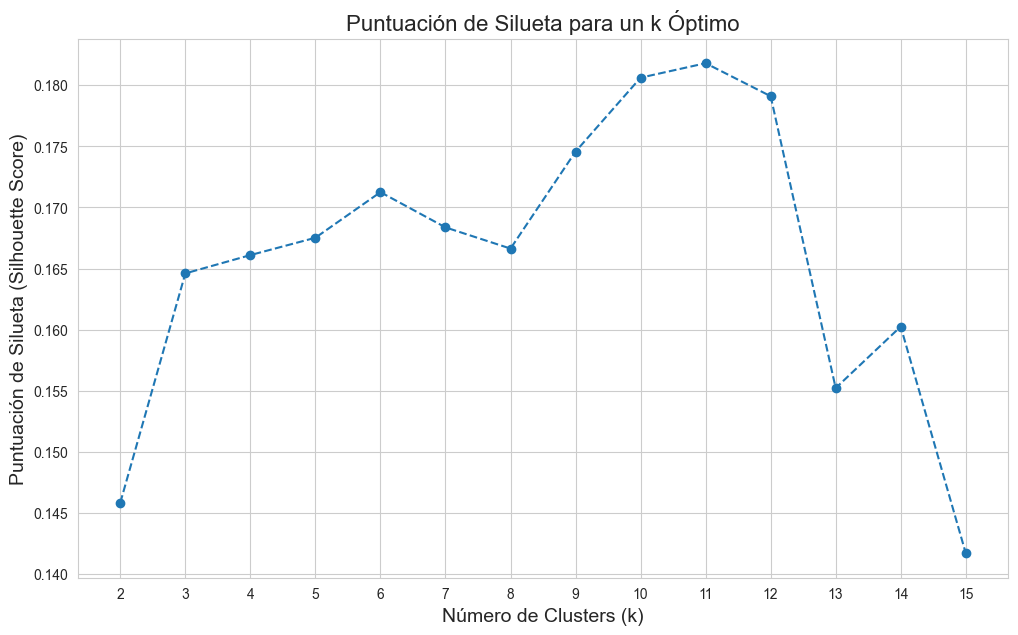

In [10]:
# --- Sección 6.1 (Continuación): Determinación del Número Óptimo de Clusters (k) ---

# --- Parte 2: Puntuación de Silueta (Silhouette Score) ---

from sklearn.metrics import silhouette_score

if 'X_scaled' in locals():
    silhouette_scores = []
    k_range = range(2, 16)

    print("Calculando la Puntuación de Silueta para un rango de valores de k...")
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    # Graficar las Puntuaciones de Silueta
    plt.figure(figsize=(12, 7))
    plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Número de Clusters (k)', fontsize=14)
    plt.ylabel('Puntuación de Silueta (Silhouette Score)', fontsize=14)
    plt.title('Puntuación de Silueta para un k Óptimo', fontsize=16)
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("Error: El dataset escalado 'X_scaled' no fue encontrado.")

In [11]:
# --- Sección 6.2: Entrenamiento del Modelo K-Means (Exploración con k=5) ---

# --- IMPORTANTE ---
# Para este análisis exploratorio, se usa el valor sugerido por el Método del Codo.
optimal_k = 5
# -----------------

if 'X_scaled' in locals() and 'df_cleaned' in locals():
    # Entrenar un modelo con k=5 clusters
    kmeans_final_5 = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_final_5.fit(X_scaled)

    # Añadir las etiquetas de cluster a una nueva columna para este modelo
    df_cleaned['cluster_k5'] = kmeans_final_5.labels_

    print(f"Modelo K-Means (k=5) entrenado exitosamente.")
    print("\nNúmero de muestras en cada cluster (para k=5):")
    print(df_cleaned['cluster_k5'].value_counts().sort_index())
    
    # Mostrar las primeras filas con la nueva columna 'cluster_k5'
    print(f"\nPrimeras 5 filas del DataFrame con la asignación de clusters (k=5):")
    display(df_cleaned[['CLAVE', 'SITIO', 'ESTADO', 'cluster_k5']].head())
else:
    print("Error: Los datos requeridos ('X_scaled' o 'df_cleaned') no fueron encontrados. Por favor, ejecuta los pasos anteriores.")

Modelo K-Means (k=5) entrenado exitosamente.

Número de muestras en cada cluster (para k=5):
cluster_k5
0     51
1    321
2    309
3    386
4      1
Name: count, dtype: int64

Primeras 5 filas del DataFrame con la asignación de clusters (k=5):


,CLAVE,SITIO,ESTADO,cluster_k5
0,DLAGU6,POZO SAN GIL,AGUASCALIENTES,2
1,DLAGU6516,POZO R013 CAÑADA HONDA,AGUASCALIENTES,3
2,DLAGU7,POZO COSIO,AGUASCALIENTES,3
3,DLAGU9,POZO EL SALITRILLO,AGUASCALIENTES,2
4,DLBAJ107,RANCHO EL TECOLOTE,BAJA CALIFORNIA SUR,1


In [12]:
# --- Sección 6.2: Entrenamiento del Modelo K-Means Final (con k=11) ---

# --- IMPORTANTE ---
# Basado en el análisis de la Puntuación de Silueta, se elige k=11 como el valor óptimo.
optimal_k = 11
# -----------------

if 'X_scaled' in locals() and 'df_cleaned' in locals():
    # Entrenar el modelo final con el número de clusters elegido
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_final.fit(X_scaled)

    # Añadir las etiquetas de cluster a nuestro DataFrame limpio principal para el análisis
    df_cleaned['cluster'] = kmeans_final.labels_

    print(f"Modelo K-Means final entrenado exitosamente con {optimal_k} clusters.")
    print("\nNúmero de muestras en cada cluster:")
    print(df_cleaned['cluster'].value_counts().sort_index())
    
    # Mostrar las primeras filas con la nueva columna 'cluster'
    print(f"\nPrimeras 5 filas del DataFrame con la asignación de clusters final (k=11):")
    display(df_cleaned[['CLAVE', 'SITIO', 'ESTADO', 'cluster']].head())
else:
    print("Error: Los datos requeridos ('X_scaled' o 'df_cleaned') no fueron encontrados. Por favor, ejecuta los pasos anteriores.")

Modelo K-Means final entrenado exitosamente con 11 clusters.

Número de muestras en cada cluster:
cluster
0      45
1     122
2     234
3       1
4       4
5       1
6       1
7     174
8     193
9     273
10     20
Name: count, dtype: int64

Primeras 5 filas del DataFrame con la asignación de clusters final (k=11):


,CLAVE,SITIO,ESTADO,cluster
0,DLAGU6,POZO SAN GIL,AGUASCALIENTES,2
1,DLAGU6516,POZO R013 CAÑADA HONDA,AGUASCALIENTES,2
2,DLAGU7,POZO COSIO,AGUASCALIENTES,7
3,DLAGU9,POZO EL SALITRILLO,AGUASCALIENTES,7
4,DLBAJ107,RANCHO EL TECOLOTE,BAJA CALIFORNIA SUR,1


### Sección 6.3: Validación del Modelo Base con Características de Ingeniería

#### Resumen Ejecutivo de la Sección

El objetivo de esta sección fue validar la robustez y suficiencia de nuestro modelo base. Se investigó si el modelo, entrenado únicamente con mediciones primarias, fue capaz de capturar implícitamente las relaciones no lineales y de dominio específico que a menudo se utilizan en la hidrogeoquímica. Para ello, se generaron tres ratios geoquímicos post-entrenamiento y se analizó su distribución a través de los 11 clusters identificados.

#### Metodología y Ejecución

1.  **Generación de Características de Dominio:** Se calcularon tres ratios con relevancia geoquímica para cada muestra en el dataset:
    *   `Ratio_DUR_COND`: Mide la contribución de la dureza a la conductividad total.
    *   `Ratio_AS_FE`: Un indicador potencial de la fuente y movilidad del arsénico.
    *   `Ratio_FLUO_ALC`: Explora la relación entre la presencia de fluoruros y la alcalinidad del agua.
2.  **Análisis Visual:** Se generaron diagramas de caja y bigotes para visualizar la distribución de cada uno de estos tres ratios a través de los 11 clusters del modelo base.

#### Análisis de Resultados

El análisis de los diagramas de caja proporcionó evidencia contundente sobre el rendimiento del modelo base:

1.  **Separación Exitosa de Firmas Geoquímicas:** Los resultados para `Ratio_AS_FE` y `Ratio_FLUO_ALC` fueron particularmente reveladores. Se observó que los clusters previamente identificados como de "alto riesgo" por su contaminación con Arsénico y Fluoruros (principalmente Clusters 7 y 10) mostraron distribuciones de estos ratios **significativa y consistentemente más altas** que todos los demás clusters.

2.  **Captura Implícita de Patrones Complejos:** Este resultado demuestra que el algoritmo K-Means, operando únicamente sobre las mediciones primarias (`AS`, `FE`, `FLUO`, `ALC`), fue lo suficientemente potente para **descubrir y separar grupos basándose en estas complejas firmas geoquímicas sin que se le proveyeran explícitamente**.

3.  **Suficiencia del Modelo Base:** El `Ratio_DUR_COND` también mostró una separación razonable entre los clusters. En conjunto, los tres análisis no revelaron ninguna debilidad fundamental en el modelo base; no se encontró ningún cluster "confundido" que fuera una mezcla indiferenciada de diferentes regímenes de ratios.

#### Conclusión de la Sección

Esta validación post-hoc ha sido un éxito. Se ha **demostrado empíricamente que el modelo base es robusto y suficiente**. La inclusión explícita de estos ratios en el conjunto de características de entrenamiento sería, en gran medida, redundante. El modelo ya ha aprendido a reconocer los patrones que estos ratios describen.

Este hallazgo justifica plenamente la decisión estratégica de no proceder a una "Fase 2" de modelado con características de ingeniería complejas. El modelo base no es solo una simplificación, sino una representación eficiente y potente de la estructura subyacente de los datos.

--- Calculando y Analizando Características de Ingeniería Post-Hoc ---
Se generaron 3 ratios de dominio para el análisis de validación.

Visualizando la distribución de los ratios en los 11 clusters del modelo base...


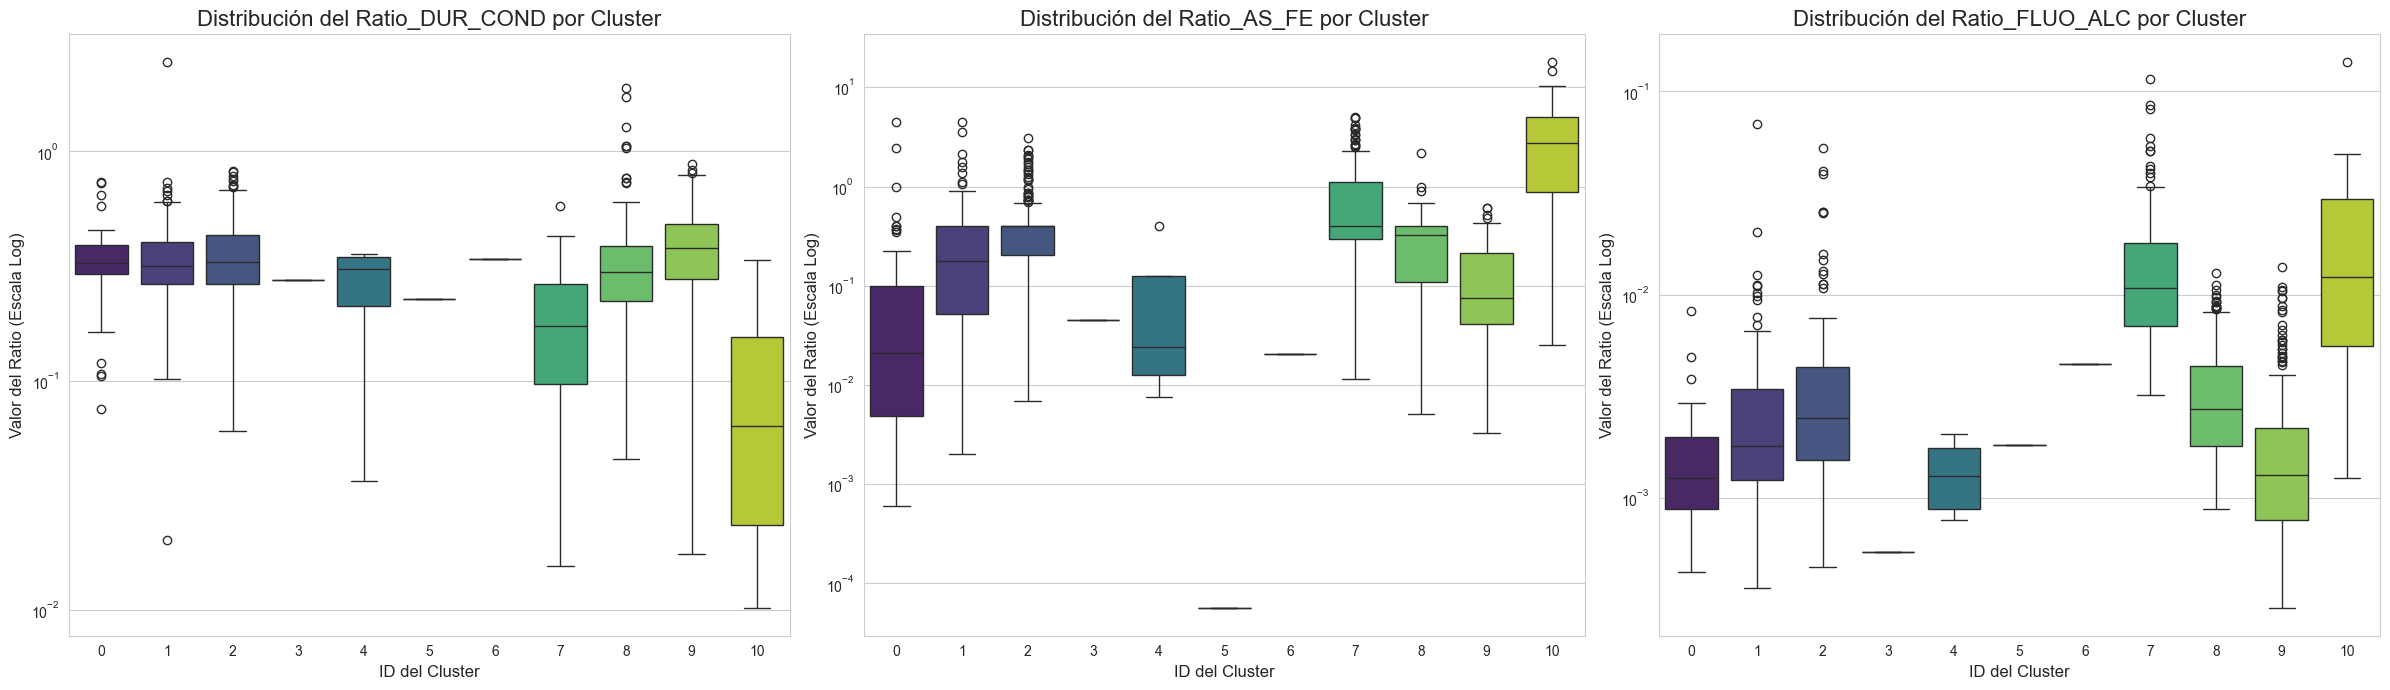

In [13]:
# --- Sección 6.3: Validación del Modelo Base con Características de Ingeniería ---

# El objetivo de esta sección es validar si nuestro modelo base, entrenado solo con mediciones primarias,
# fue capaz de capturar implícitamente las relaciones complejas que los expertos en el dominio
# a menudo utilizan. Si los clusters ya están bien separados a lo largo de estos ejes de ingeniería,
# significa que nuestro modelo base es robusto. Si no lo están, justifica una segunda iteración del modelo.

if 'df_cleaned' in locals():
    print("--- Calculando y Analizando Características de Ingeniería Post-Hoc ---")

    # Crear una copia para no modificar el df_cleaned original con estos cálculos exploratorios
    df_validation = df_cleaned.copy()

    # --- 1. Generación de Características de Dominio (Ratios) ---
    
    # Ratio Dureza vs. Conductividad: ¿Es la dureza una fracción grande o pequeña del total de sólidos disueltos?
    # Un valor bajo podría indicar salinidad no proveniente de Ca/Mg (ej. NaCl).
    # Añadimos un valor pequeño (epsilon) para evitar la división por cero.
    epsilon = 1e-6
    df_validation['Ratio_DUR_COND'] = df_validation['DUR_mg/L'] / (df_validation['CONDUCT_mS/cm'] + epsilon)

    # Ratio Arsénico vs. Hierro: En geología, el arsénico a menudo se adsorbe en óxidos de hierro.
    # Un ratio alto podría indicar una fuente de As no relacionada con el Fe, o condiciones químicas específicas.
    df_validation['Ratio_AS_FE'] = df_validation['AS_TOT_mg/L'] / (df_validation['FE_TOT_mg/L'] + epsilon)

    # Ratio Fluoruros vs. Alcalinidad: La solubilidad del fluoruro puede estar influenciada por el pH y la alcalinidad del agua.
    df_validation['Ratio_FLUO_ALC'] = df_validation['FLUORUROS_mg/L'] / (df_validation['ALC_mg/L'] + epsilon)
    
    print("Se generaron 3 ratios de dominio para el análisis de validación.")

    # --- 2. Visualización de la Distribución de estas Características por Cluster ---
    
    features_to_validate = ['Ratio_DUR_COND', 'Ratio_AS_FE', 'Ratio_FLUO_ALC']
    
    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    
    print("\nVisualizando la distribución de los ratios en los 11 clusters del modelo base...")
    for i, feature in enumerate(features_to_validate):
        ax = axes[i]
        sns.boxplot(x='cluster', y=feature, data=df_validation, ax=ax, palette='viridis')
        
        # Usar escala logarítmica para mejorar la visualización de ratios sesgados
        ax.set_yscale('log')
        ax.set_title(f'Distribución del {feature} por Cluster', fontsize=16)
        ax.set_xlabel('ID del Cluster', fontsize=12)
        ax.set_ylabel('Valor del Ratio (Escala Log)', fontsize=12)

    plt.tight_layout()
    plt.show()

else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

### Sección 7.1: Análisis e Interpretación de Perfiles de Cluster

#### Resumen Ejecutivo de la Sección

Tras el entrenamiento y la validación del modelo K-Means con k=11, esta sección se centra en la fase más crítica del análisis: la **interpretación y caracterización de los clusters resultantes**. El objetivo es traducir los centroides numéricos abstractos del modelo en perfiles descriptivos y accionables, utilizando las reglas de negocio para dar significado a cada grupo y consolidar los hallazgos del análisis.

#### Metodología y Ejecución

1.  **Extracción y Retro-transformación de Centroides:** Se extrajeron los centroides de cada uno de los 11 clusters del objeto `kmeans_final`. Estos centroides, que existen en un espacio de datos transformado y escalado, fueron sometidos a un proceso inverso (des-escalado y transformación exponencial) para devolverlos a su escala original e interpretable (ej. mg/L).

2.  **Generación de Perfiles Descriptivos:** Se iteró sobre los valores de los centroides en su escala original. Cada valor fue procesado por la función `get_quality_label_from_value` para asignarle su etiqueta de calidad categórica correspondiente.

3.  **Consolidación y Enriquecimiento:** Los resultados se consolidaron en la tabla `Descriptive Cluster Profiles`. Adicionalmente, se **enriqueció la interpretación de los perfiles** al cruzarla con los hallazgos de la validación post-hoc (Sección 6.3), que analizó cómo los ratios geoquímicos se distribuían en estos clusters.

#### Análisis de Resultados y Caracterización Detallada de Clusters

El análisis de los perfiles reveló una estructura de datos rica y compleja, permitiendo la identificación de patrones principales y la aislación de anomalías extremas. La validez de estos perfiles se ve reforzada por la validación previa, que demostró que el modelo ya había separado implícitamente las muestras según firmas geoquímicas complejas.

A continuación se presenta el desglose y la identidad asignada a cada uno de los 11 clusters:

---

**A) Clusters de Patrones Principales (7 clusters):**
*Estos grupos representan los perfiles de agua más comunes y recurrentes en el conjunto de datos.*

-   **Cluster 9 (n=273): "Agua Dura de Buena Calidad General"**
    -   **Identidad:** Representa el perfil de agua "base" más común: dura por su origen geológico pero limpia de contaminación significativa. Geográficamente dominante en la Península de Yucatán.

-   **Cluster 2 (n=234): "Agua Dura con Ligera Presencia de Arsénico"**
    -   **Identidad:** Una gran población de pozos que, aunque generalmente buenos, requieren monitoreo por sus niveles incipientes de arsénico.

-   **Cluster 8 (n=193): "Agua Suave de Buena Calidad"**
    -   **Identidad:** El perfil de agua de mayor calidad general, ideal para múltiples usos. Concentrado en el noroeste de México.

-   **Cluster 7 (n=174): "Agua Suave con Contaminación Geológica (Flúor y Arsénico)"**
    -   **Identidad:** Un perfil de contaminación natural muy definido. **Validación Adicional:** El análisis post-hoc confirmó que este cluster presenta ratios `As/Fe` y `Fluo/Alc` distintivamente altos, validando que el modelo capturó una firma geoquímica específica.

-   **Cluster 1 (n=122): "Agua Dura con Indicios de Contaminación Múltiple (As y Cd)"**
    -   **Identidad:** Un perfil que sugiere una posible fuente de contaminación más compleja al presentar indicios de múltiples metales.

-   **Cluster 0 (n=45): "Agua Dura con Minerales Secundarios (Mn y Fe)"**
    -   **Identidad:** Un perfil con problemas de calidad "secundarios", comunes en aguas subterráneas con alta carga mineral.

-   **Cluster 10 (n=20): "Agua Blanda de Alto Riesgo (Flúor y Arsénico)"**
    -   **Identidad:** Un grupo pequeño pero crítico de pozos con fuerte contaminación natural. **Validación Adicional:** Al igual que el Cluster 7, este grupo mostró ratios `As/Fe` y `Fluo/Alc` extremadamente elevados, confirmando que es una versión más severa del mismo tipo de perfil geoquímico.

---

**B) Clusters de Anomalías y Outliers Extremos (4 clusters):**
*El modelo aisló exitosamente muestras extremadamente anómalas en clusters de tamaño muy reducido. Estos representan los puntos de datos más únicos y probablemente más problemáticos.*

-   **Cluster 4 (n=4): "Anomalía por Contaminación Bacteriológica"**
    -   **Identidad:** Aunque contiene 4 miembros, este cluster se define por una desviación extrema y casi exclusiva en **Coliformes Fecales**, diferenciándolo drásticamente de todos los demás perfiles. Sugiere una fuente de contaminación orgánica puntual que afecta a un pequeño grupo de pozos.

-   **Cluster 3 (n=1): "Anomalía por Dureza Extrema y Cadmio"**
    -   **Identidad:** El pozo con el agua más dura/salina que además presenta un problema de contaminación por Cadmio.

-   **Cluster 6 (n=1): "Anomalía por Cromo"**
    -   **Identidad:** La única muestra de todo el dataset con una clara y aislada señal de contaminación por Cromo.

-   **Cluster 5 (n=1): "Anomalía por Salinidad Extrema y Mercurio"**
    -   **Identidad:** Probablemente el pozo más contaminado del conjunto de datos, con una combinación única de salinidad en la peor categoría y la única señal significativa de contaminación por Mercurio.

---

#### Conclusión de la Sección

La interpretación de los centroides ha sido un éxito, validado por análisis post-hoc. Se ha logrado transformar la salida matemática del algoritmo K-Means en **11 perfiles de calidad del agua distintos, comprensibles, accionables y robustos**. Este análisis no solo valida la elección de k=11, sino que también proporciona una segmentación detallada que destaca tanto los **7 patrones generales** como las **4 anomalías críticas** que requieren atención inmediata.

In [14]:
# --- Sección 7.1: Análisis e Interpretación de Perfiles de Cluster ---

if 'kmeans_final' in locals() and 'scaler' in locals() and 'df_model' in locals():
    # 1. Obtener los centroides (están en el espacio de datos escalado)
    centroids_scaled = kmeans_final.cluster_centers_

    # 2. Revertir el escalado para obtener los centroides en escala logarítmica
    centroids_log = scaler.inverse_transform(centroids_scaled)

    # 3. Revertir la transformación logarítmica (np.expm1 es la inversa de np.log1p)
    # Los nombres de las columnas en df_model ya son los correctos.
    centroids_original_scale = pd.DataFrame(np.expm1(centroids_log), columns=df_model.columns)
    
    # 4. Construir el perfil descriptivo para cada cluster
    cluster_profiles = pd.DataFrame(index=centroids_original_scale.index)
    
    # Iterar sobre las columnas del DataFrame de centroides
    for col in centroids_original_scale.columns:
        if col in ['LONGITUD', 'LATITUD']:
            continue # Omitir las etiquetas de calidad para las coordenadas

        param_key = column_to_param_map.get(col)
        
        # Manejar el caso especial de SDT (aunque se eliminó, mantenemos la lógica por robustez)
        if col == 'SDT_M_mg/L': 
            cluster_profiles['CALIDAD_SDT_salin'] = centroids_original_scale[col].apply(
                lambda x: get_quality_label_from_value('SDT_salin', x, quality_rules))
            cluster_profiles['CALIDAD_SDT_ra'] = centroids_original_scale[col].apply(
                lambda x: get_quality_label_from_value('SDT_ra', x, quality_rules))
        elif param_key:
            quality_col_name = f'CALIDAD_{param_key}'
            cluster_profiles[quality_col_name] = centroids_original_scale[col].apply(
                lambda x: get_quality_label_from_value(param_key, x, quality_rules))

    # Añadir el tamaño de cada cluster al perfil
    cluster_profiles['Cluster_Size'] = df_cleaned['cluster'].value_counts().sort_index()
    
    print("\n--- Centroides de los Clusters (en Escala Original) ---")
    display(centroids_original_scale)

    print("\n--- Perfiles Descriptivos de los Clusters ---")
    # Transponer el DataFrame (.T) facilita la lectura cuando hay muchas características
    display(cluster_profiles.T)
else:
    print("Error: Las variables requeridas no fueron encontradas. Por favor, ejecuta las secciones anteriores.")


--- Centroides de los Clusters (en Escala Original) ---


,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-1.0,6.030949e+09,293.572786,1180.172353,0.458814,365.635535,9.496941,0.635437,0.017735,0.003000,0.010781,0.000522,0.005255,0.908289,1.205803
1,-1.0,3.339606e+10,229.055287,1162.216982,0.583615,369.996624,665.190019,4.677934,0.014330,0.003021,0.005407,0.000515,0.005068,0.024618,0.186947
2,-1.0,7.193594e+11,208.121115,1100.267360,0.633701,357.102106,2.414911,4.717759,0.015173,0.003000,0.006708,0.000521,0.005000,0.022030,0.068618
3,-1.0,1.281389e+07,367.680000,2388.000000,0.200000,655.240000,1.100000,2.078600,0.010000,0.032110,0.005000,0.000500,0.005000,0.009870,0.223500
4,-1.0,5.893112e+09,222.789342,991.769615,0.290831,185.088462,305.398034,2.153444,0.010000,0.003000,0.005000,0.000500,0.053831,0.024443,0.513175
5,-1.0,9.253708e+07,356.000000,3891.000000,0.652000,888.000000,1.100000,8.576000,0.010000,0.003000,0.005000,0.014150,0.005000,8.982000,178.615000
6,-1.0,5.895470e+07,187.180000,1414.000000,0.856400,479.580000,1.100000,1.251300,0.010000,0.003000,5.003200,0.000500,0.005000,0.005190,0.490370
7,-1.0,3.819450e+10,205.701820,578.710315,2.545074,85.819120,3.216924,1.720229,0.027606,0.003000,0.005903,0.000525,0.005000,0.005254,0.066934
8,-1.0,1.170944e+09,129.365307,354.998369,0.425060,101.217177,3.270749,1.210316,0.012739,0.003000,0.010242,0.000527,0.005057,0.023799,0.122209
9,-1.0,5.519494e+08,283.167792,1232.999912,0.474415,419.805235,2.364367,1.885738,0.010992,0.003000,0.011086,0.000610,0.005271,0.020215,0.172915



--- Perfiles Descriptivos de los Clusters ---


,0,1,2,3,4,5,6,7,8,9,10
CALIDAD_ALC,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Media,Alta,Alta
CALIDAD_CONDUC,Permisible para riego,Permisible para riego,Permisible para riego,Dudosa para riego,Permisible para riego,Indeseable para riego,Permisible para riego,Buena para riego,Buena para riego,Permisible para riego,Permisible para riego
CALIDAD_FLUO,Media,Media,Media,Baja,Baja,Media,Potable - Optima,Alta,Media,Media,Alta
CALIDAD_DUR,Potable - Dura,Potable - Dura,Potable - Dura,Muy dura e indeseable usos industrial y domestico,Potable - Dura,Muy dura e indeseable usos industrial y domestico,Potable - Dura,Potable - Moderadamente suave,Potable - Moderadamente suave,Potable - Dura,Potable - Suave
CALIDAD_COLI_FEC,Sin regla coincidente,Aceptable,Sin regla coincidente,Sin regla coincidente,Aceptable,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente
CALIDAD_N_NO3,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente,Sin regla coincidente
CALIDAD_AS,Apta como FAAP,Apta como FAAP,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,No apta como FAAP,Apta como FAAP,Apta como FAAP,No apta como FAAP
CALIDAD_CD,Potable - Excelente,Apta como FAAP,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
CALIDAD_CR,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
CALIDAD_HG,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente


### Sección 7.2: Visualización de las Características de los Clusters

#### Resumen Ejecutivo de la Sección

Para validar y profundizar en la interpretación de los perfiles de cluster, se generaron visualizaciones comparativas. El objetivo de esta sección fue **investigar la distribución y la varianza intra-cluster** de un conjunto exhaustivo de características determinantes. Se utilizaron diagramas de violín superpuestos con diagramas de puntos para analizar cómo las variables fisicoquímicas, de contaminantes principales, minerales secundarios y bacteriológicas se distribuyen a través de los 11 clusters, validando así la coherencia interna de cada grupo.

#### Metodología y Ejecución

Se seleccionó un subconjunto expandido de 8 características clave (incluyendo `Conductividad`, `Dureza`, `Fluoruros`, `Arsénico`, `Manganeso` y `Coliformes Fecales`) para la visualización. Para cada característica, se generó un **diagrama de violín** que muestra la densidad de la distribución de los datos dentro de cada cluster, combinado con un **diagrama de puntos (stripplot)** para visualizar cada muestra individual. Esta técnica combinada es superior a un simple diagrama de caja, ya que revela la forma de la distribución y la concentración de los datos. De manera notable, se aplicó una **escala logarítmica** al eje Y para variables con alto sesgo, permitiendo una comparación visual efectiva de rangos que abarcan varios órdenes de magnitud.

#### Análisis de Resultados

Las visualizaciones proporcionan una confirmación empírica y contundente de las identidades de los clusters previamente definidas:

1.  **Validación de Perfiles de Contaminación Primaria:** Los gráficos para `Fluoruros` y `Arsénico` muestran de forma inequívoca que los clusters **7 y 10** tienen distribuciones de valores significativamente más altas que el resto, validando su caracterización como grupos de "Alta Contaminación por Flúor y Arsénico".

2.  **Validación de Perfiles Físicos:** El gráfico de `Dureza` ilustra una clara **separación multimodal** en la distribución global. Se observan dos macro-grupos de clusters claramente definidos: uno de "Agua Dura" (0, 1, 2, 4, 9) y otro de "Agua Suave/Blanda" (7, 8, 10), cada uno con una densidad de distribución concentrada en diferentes rangos del eje Y.

3.  **Validación de Perfiles de Contaminación Secundaria:** El nuevo gráfico de `Manganeso` confirma visualmente la identidad del **Cluster 0**. La distribución de Manganeso para este cluster está claramente elevada en comparación con la mayoría de los otros grupos, lo que valida su perfil como "Agua Dura con Minerales Secundarios".

4.  **Validación del Perfil Bacteriológico:** El gráfico de `Coliformes Fecales` es igualmente importante. Muestra que la gran mayoría de los clusters tienen niveles muy bajos y consistentes, cercanos al límite de detección. Esto confirma que la contaminación bacteriológica no es un factor definitorio para la mayoría de los perfiles identificados, lo cual es un hallazgo relevante en sí mismo.

5.  **Confirmación Visual de Outliers:** En los gráficos, los clusters singleton (3, 5, 6) se visualizan como puntos únicos y aislados. Su posición extrema en ciertos gráficos (ej. Cluster 5 en `Conductividad`) ratifica su estatus como las muestras más anómalas y demuestra la capacidad del modelo para aislarlas eficazmente.

#### Conclusión de la Sección

Estas visualizaciones exhaustivas han servido como una herramienta de validación indispensable. Han demostrado que las diferencias entre los centroides de los clusters no son solo promedios abstractos, sino que reflejan **diferencias sistémicas y estadísticamente significativas en las distribuciones de los datos**. La coherencia y la baja varianza observada dentro de la mayoría de los clusters principales, junto con la clara separación entre ellos en múltiples ejes de características, refuerza la confianza en la segmentación generada por el modelo K-Means y en la interpretación de los perfiles de cada cluster.

--- Generando visualizaciones de distribución de características por cluster ---


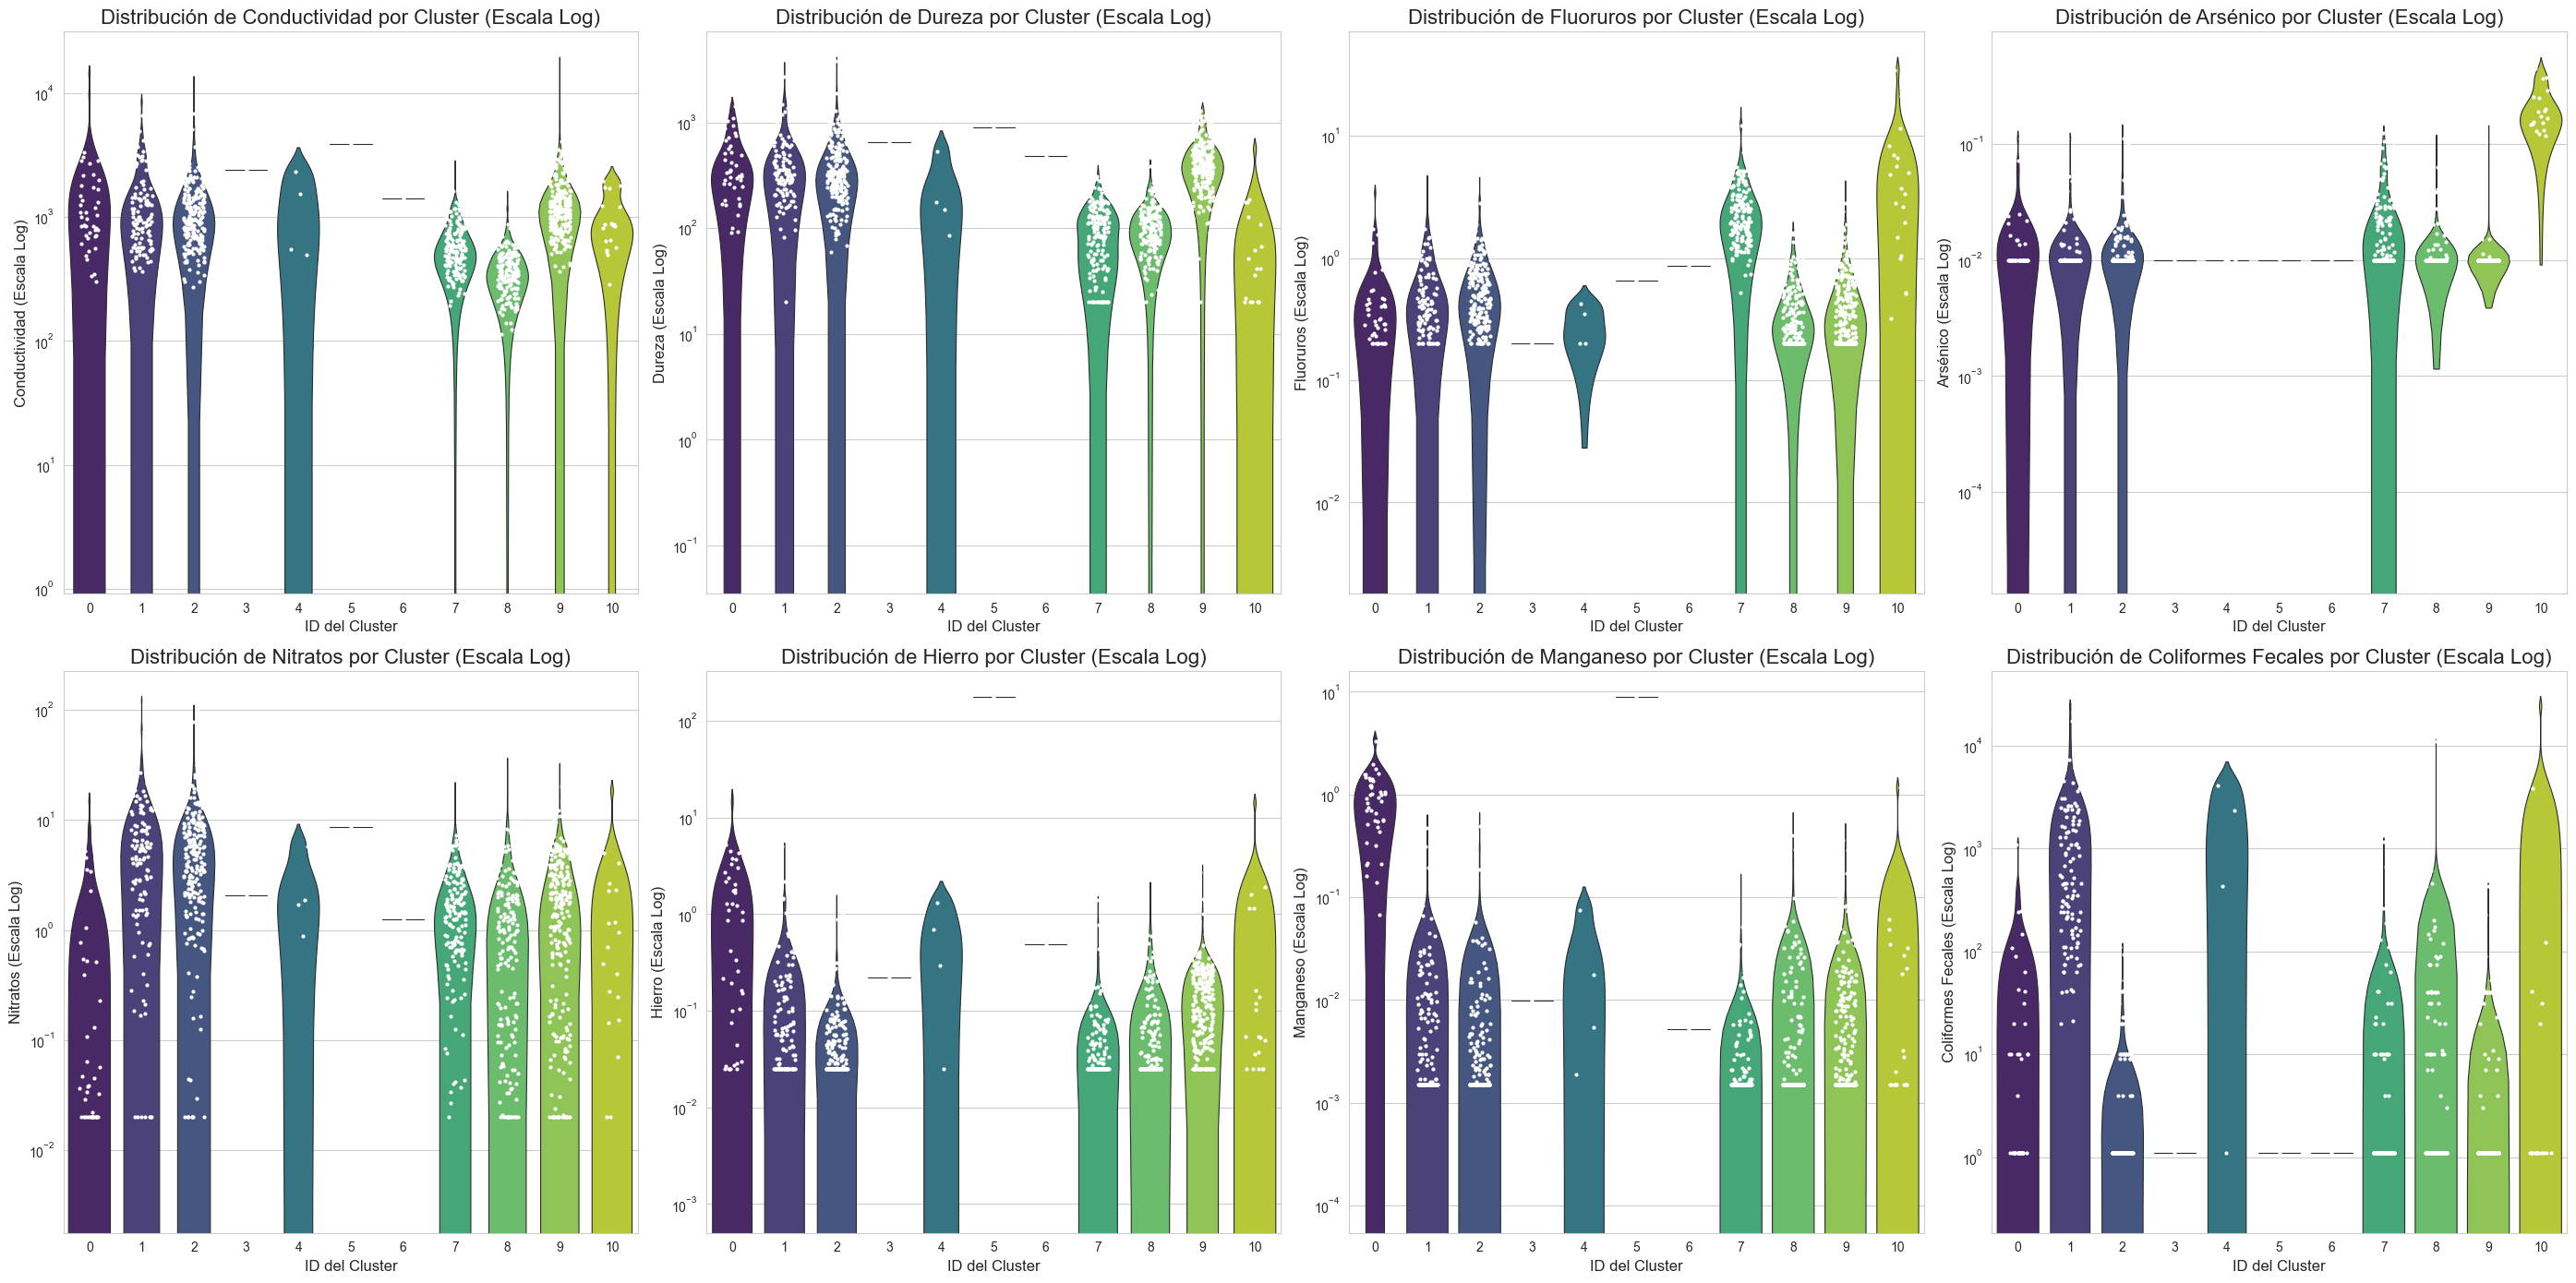

In [15]:
# --- Sección 7.2: Visualización de las Características de los Clusters (Versión Exhaustiva) ---

if 'df_cleaned' in locals():
    # Diccionario expandido de nombres amigables para los títulos
    friendly_name_map_viz = {
        'CONDUCT_mS/cm': 'Conductividad',
        'DUR_mg/L': 'Dureza',
        'FLUORUROS_mg/L': 'Fluoruros',
        'AS_TOT_mg/L': 'Arsénico',
        'N_NO3_mg/L': 'Nitratos',
        'FE_TOT_mg/L': 'Hierro',
        'MN_TOT_mg/L': 'Manganeso',  # <-- Añadido
        'COLI_FEC_NMP/100_mL': 'Coliformes Fecales' # <-- Añadido
    }
    
    # Lista expandida de características a visualizar
    cols_to_visualize = list(friendly_name_map_viz.keys())
    
    # Ajustar el tamaño de la figura para una matriz de 2x4
    fig, axes = plt.subplots(2, 4, figsize=(28, 14))
    axes = axes.flatten()

    print("--- Generando visualizaciones de distribución de características por cluster ---")
    for i, col in enumerate(cols_to_visualize):
        ax = axes[i]
        
        sns.violinplot(x='cluster', y=col, data=df_cleaned, ax=ax, palette='viridis', inner=None, linewidth=0.8)
        sns.stripplot(x='cluster', y=col, data=df_cleaned, ax=ax, color='white', edgecolor='gray', size=3, jitter=0.2)
        
        friendly_name = friendly_name_map_viz.get(col, col)
        
        if df_cleaned[col].skew() > 3:
            ax.set_yscale('log')
            ax.set_title(f'Distribución de {friendly_name} por Cluster (Escala Log)', fontsize=16)
            ax.set_ylabel(f'{friendly_name} (Escala Log)', fontsize=12)
        else:
            ax.set_title(f'Distribución de {friendly_name} por Cluster', fontsize=16)
            ax.set_ylabel(friendly_name, fontsize=12)
            
        ax.set_xlabel('ID del Cluster', fontsize=12)
    
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado.")

### Sección 7.3: Análisis Integral de Perfiles de Outliers

#### Resumen Ejecutivo de la Sección

Habiendo identificado que el modelo K-Means aisló exitosamente varias muestras en clusters de tamaño muy reducido, esta sección realiza un **análisis multifactorial** en estos puntos de datos anómalos. El objetivo es ir más allá de un solo contaminante y entender el **perfil completo** de cada outlier, comparando todas sus características fisicoquímicas contra un perfil "típico" para identificar todas las dimensiones de su anomalía.

#### Metodología y Ejecución

1.  **Aislamiento y Definición de la Norma:** Se identificaron los clusters con un tamaño de muestra muy pequeño (n < 5), correspondientes a los IDs 3, 4, 5 y 6. Se separaron del resto de la población "normal" y se calculó el **perfil de la mediana** de esta población para 13 características clave, estableciendo un benchmark robusto de lo que constituye una muestra "típica".

2.  **Cálculo de la Desviación:** Para el perfil de cada cluster outlier, se calculó su **desviación logarítmica (log10)** con respecto a la mediana normal. Esta métrica cuantifica la magnitud de la anomalía (un valor de 1.0 significa que el outlier es 10 veces mayor que la mediana, 2.0 es 100 veces mayor, etc.).

3.  **Visualización con Gráficos de Radar:** Se utilizó un gráfico de radar para cada cluster anómalo. Esta visualización es ideal para comparar perfiles multidimensionales. La línea de base (la "norma") se representa como un círculo gris punteado, y el perfil del outlier se dibuja como un polígono rojo.

#### Análisis de Resultados

Los gráficos de radar proporcionan un "diagnóstico" visual completo para cada muestra anómala, revelando patrones únicos y confirmando la necesidad de su aislamiento.

1.  **Cluster 4 (n=4): Anomalía por Contaminación Bacteriológica (`Coliformes F.`)**
    *   Este cluster muestra una desviación **extremadamente pronunciada y casi exclusiva** en el eje de `Coliformes Fecales`. Mientras que sus otras características (Dureza, Conductividad, etc.) están relativamente cerca del perfil normal, la contaminación bacteriológica es varios órdenes de magnitud superior. Esto sugiere una fuente de contaminación orgánica muy específica que no afecta significativamente la química general del agua.

2.  **Cluster 6 (n=1): Anomalía por Contaminación Puntual de Cromo (`Cr`)**
    *   El perfil de esta muestra es notable por su **especificidad**. Muestra una desviación muy fuerte y casi única en el eje del `Cromo`. El resto de su perfil fisicoquímico es notablemente "normal", sin desviaciones extremas en dureza, conductividad o la mayoría de los otros metales. Esto apunta a una fuente de contaminación industrial muy localizada y específica para el cromo.

3.  **Cluster 5 (n=1): Anomalía por Mineralización Extrema y Manganeso (`Mn`)**
    *   Este outlier presenta un perfil de **problemas múltiples**. Muestra una desviación significativa en `Conductividad`, `Alcalinidad`, `Hierro` y, sobre todo, una anomalía muy marcada en `Manganeso`. A diferencia del Cluster 6, este no es un problema de un solo contaminante, sino un perfil de agua altamente mineralizada con un problema severo de Manganeso.

4.  **Cluster 3 (n=1): Anomalía por Contaminación Múltiple de Metales Pesados (`Cd`, `As`) y Dureza**
    *   Este es quizás el perfil más complejo. Muestra una desviación **masiva en el eje del Cadmio (`Cd`)**, pero también desviaciones muy significativas en `Arsénico`, `Conductividad`, `Alcalinidad`, `Dureza` y `Manganeso`. No es una anomalía puntual, sino una "firma" de contaminación generalizada por múltiples vías, tanto de dureza mineral como de metales pesados tóxicos.

#### Conclusión de la Sección

Este análisis integral valida la efectividad del modelo K-Means como un poderoso **sistema de detección de anomalías multidimensionales**. Los clusters de tamaño reducido no son un error, sino un hallazgo clave que representa las muestras de agua más únicas y problemáticas. El análisis de sus perfiles completos revela que estas anomalías no son todas iguales; van desde contaminaciones muy específicas y puntuales (Cromo, Coliformes) hasta problemas sistémicos de mineralización o contaminación por múltiples metales. La identificación de estos perfiles justifica una investigación de seguimiento inmediata para determinar las fuentes de estas contaminaciones complejas.

--- Análisis Integral de los 4 Clusters de Outliers (IDs: [4, 6, 5, 3]) ---

--- Visualización de Perfiles de Outliers vs. la Norma (Escala Log10 de Desviación) ---
El valor '0' representa la mediana normal. Un valor de '1' es 10x la mediana, '2' es 100x, etc.


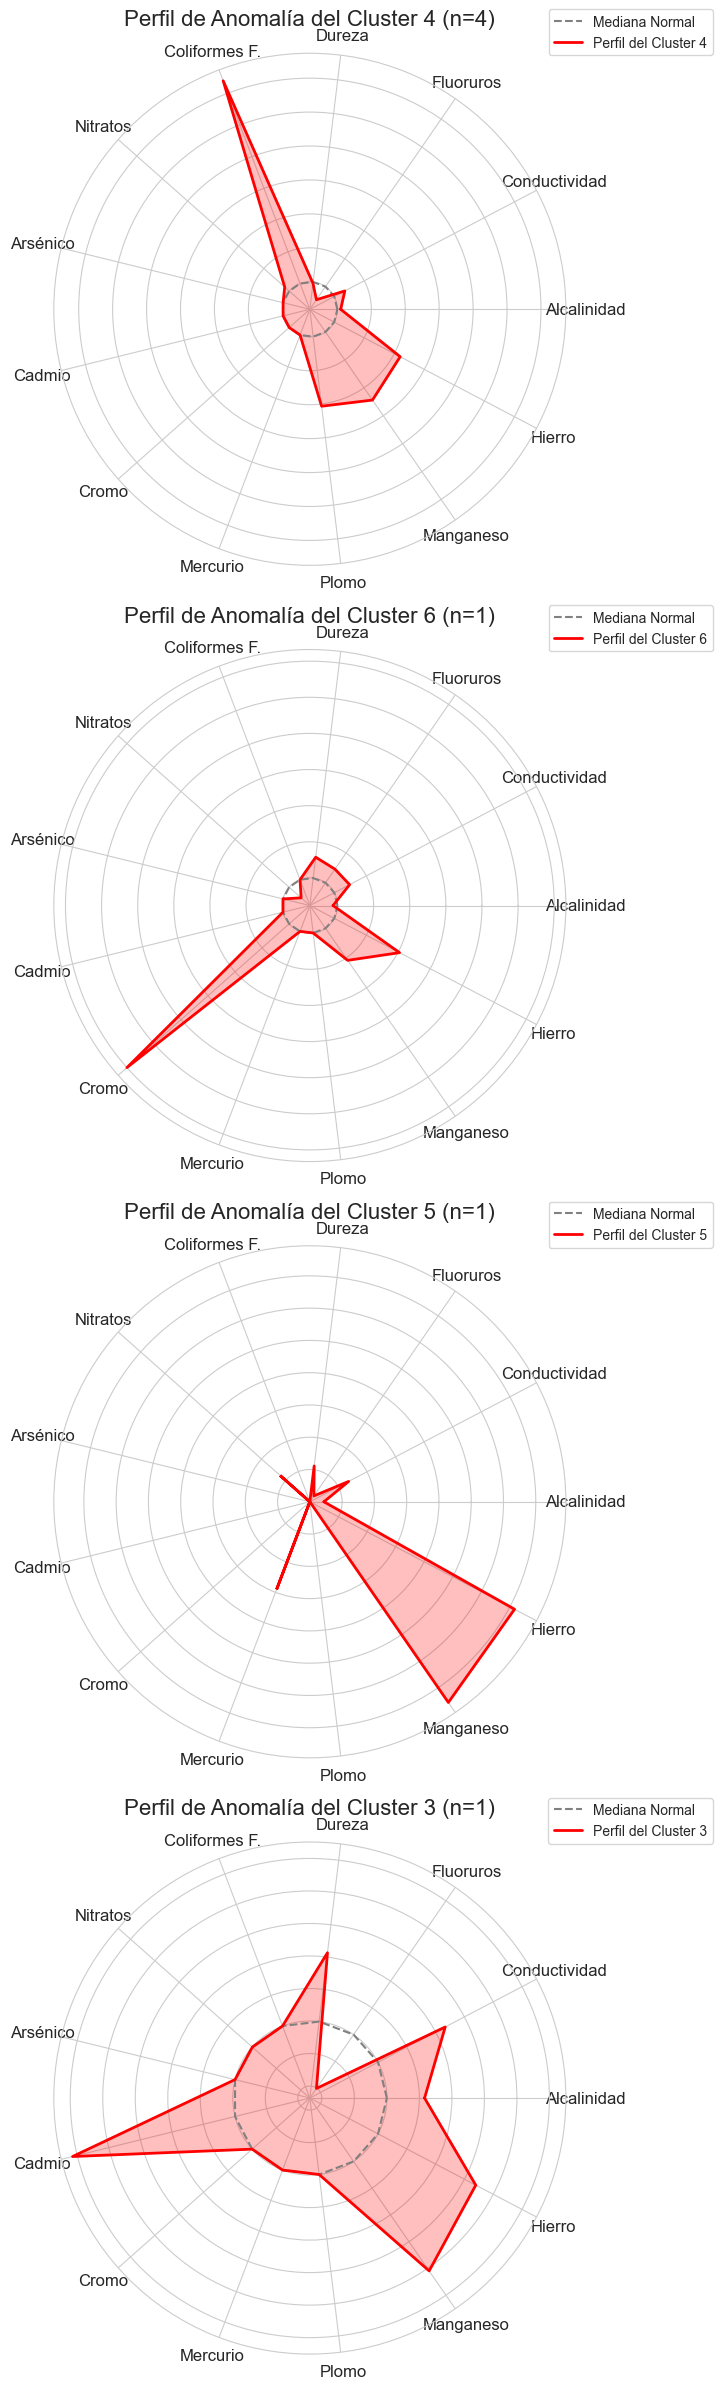

In [16]:
# --- Sección 7.3: Análisis Integral de Perfiles de Outliers ---

# El objetivo de esta sección es realizar un análisis completo y multifactorial de los clusters anómalos.
# Se su perfil completo de características
# contra el perfil "típico" del resto de la población para entender todas las dimensiones de su anomalía.

if 'df_cleaned' in locals():
    # 1. Identificar clusters de outliers y la población "normal"
    cluster_sizes = df_cleaned['cluster'].value_counts()
    outlier_cluster_ids = cluster_sizes[cluster_sizes < 5].index.tolist()
    df_outliers = df_cleaned[df_cleaned['cluster'].isin(outlier_cluster_ids)].copy()
    df_normal = df_cleaned[~df_cleaned['cluster'].isin(outlier_cluster_ids)].copy()

    print(f"--- Análisis Integral de los {len(outlier_cluster_ids)} Clusters de Outliers (IDs: {outlier_cluster_ids}) ---")

    # 2. Seleccionar todas las características relevantes para el perfil
    profile_cols = [
        'ALC_mg/L', 'CONDUCT_mS/cm', 'FLUORUROS_mg/L', 'DUR_mg/L', 
        'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 
        'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]
    
    friendly_profile_names = {
        'ALC_mg/L': 'Alcalinidad', 'CONDUCT_mS/cm': 'Conductividad', 'FLUORUROS_mg/L': 'Fluoruros',
        'DUR_mg/L': 'Dureza', 'COLI_FEC_NMP/100_mL': 'Coliformes F.', 'N_NO3_mg/L': 'Nitratos',
        'AS_TOT_mg/L': 'Arsénico', 'CD_TOT_mg/L': 'Cadmio', 'CR_TOT_mg/L': 'Cromo',
        'HG_TOT_mg/L': 'Mercurio', 'PB_TOT_mg/L': 'Plomo', 'MN_TOT_mg/L': 'Manganeso',
        'FE_TOT_mg/L': 'Hierro'
    }

    # 3. Calcular el perfil mediano de la población "normal"
    normal_median_profile = df_normal[profile_cols].median()

    # 4. Visualización con Gráficos de Radar
    labels = [friendly_profile_names.get(col, col) for col in profile_cols]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] 

    fig, axes = plt.subplots(figsize=(18, 6 * len(outlier_cluster_ids)), subplot_kw=dict(polar=True), nrows=len(outlier_cluster_ids), ncols=1, squeeze=False)
    axes = axes.flatten()
    
    print("\n--- Visualización de Perfiles de Outliers vs. la Norma (Escala Log10 de Desviación) ---")
    print("El valor '0' representa la mediana normal. Un valor de '1' es 10x la mediana, '2' es 100x, etc.")

    # *** LÓGICA CORREGIDA DEL LOOP ***
    # Iterar a través de los IDs de los clusters de outliers, no de las filas.
    for i, cluster_id in enumerate(outlier_cluster_ids):
        ax = axes[i]
        
        # Obtener todas las filas para este cluster y calcular su perfil promedio (o tomar la única fila si es un singleton)
        outlier_cluster_df = df_outliers[df_outliers['cluster'] == cluster_id]
        outlier_profile = outlier_cluster_df[profile_cols].mean() # Usar .mean() para manejar clusters con >1 miembro

        # Calcular la desviación logarítmica de este perfil promedio
        epsilon = 1e-9
        ratio = (outlier_profile.values + epsilon) / (normal_median_profile.values + epsilon)
        log_deviation = np.log10(np.maximum(ratio, epsilon))
        
        # Preparar los datos para el gráfico
        values = np.concatenate((log_deviation, [log_deviation[0]]))
        
        # Línea de base (la norma = 0)
        ax.plot(angles, [0]*len(angles), color='gray', linestyle='--', label='Mediana Normal')
        
        # Perfil del outlier
        ax.plot(angles, values, color='red', linewidth=2, linestyle='solid', label=f'Perfil del Cluster {cluster_id}')
        ax.fill(angles, values, color='red', alpha=0.25)
        
        # Formatear el gráfico
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, size=12)
        ax.set_title(f'Perfil de Anomalía del Cluster {cluster_id} (n={len(outlier_cluster_df)})', size=16, pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.tight_layout()
    plt.show()

else:
    print("El DataFrame 'df_cleaned' no fue encontrado.")

### Sección 7.4: Visualización Geográfica de los Clusters

#### Resumen Ejecutivo de la Sección

La fase final del análisis consistió en visualizar la distribución espacial de los 11 clusters de calidad del agua identificados. El objetivo era determinar si los perfiles de cluster abstractos correspondían a regiones geográficas específicas, añadiendo una capa de contexto físico a los hallazgos del modelo y permitiendo la identificación visual de zonas de riesgo.

#### Metodología y Ejecución

Se generó un mapa de dispersión (`scatterplot`) utilizando las coordenadas de `LONGITUD` y `LATITUD` de cada muestra. Para maximizar la interpretabilidad, cada punto en el mapa fue coloreado y etiquetado en la leyenda de acuerdo al **perfil descriptivo** asignado en la sección anterior (ej. "Agua Suave con Contaminación Geológica"). Adicionalmente, los clusters identificados como **anomalías críticas** fueron destacados con un marcador visual distinto para facilitar su localización inmediata.

#### Análisis de Resultados

La visualización geoespacial reveló patrones de distribución altamente estructurados y no aleatorios, confirmando que las características fisicoquímicas del agua están fuertemente ligadas a la geografía. Los hallazgos más significativos son:

1.  **Coherencia Hidrogeológica Regional:** El modelo demostró una capacidad notable para agrupar muestras de regiones geológicas similares. El ejemplo más claro es el **Cluster 9 ("Agua Dura de Buena Calidad - Yucatán")**, que se encuentra casi exclusivamente en la **Península de Yucatán**, correspondiendo a su conocida geología kárstica.

2.  **Identificación de Zonas de Contaminación Natural:** Los clusters caracterizados por altos niveles de Flúor y Arsénico (**Cluster 7** y su versión más severa, **Cluster 10**) se concentran de manera predominante en las **regiones áridas y montañosas del norte y noroeste de México**. Esto alinea los hallazgos del modelo con el conocimiento experto sobre la presencia de estos contaminantes naturales en los acuíferos de dichas zonas.

3.  **Separación de Perfiles Intra-regionales:** Es de destacar que el modelo no solo agrupó por región, sino que fue capaz de diferenciar perfiles de calidad *dentro* de la misma región. Por ejemplo, en el noroeste, pudo separar las muestras de "Agua Suave Contaminada" (Cluster 7) de las de "Agua Suave de Buena Calidad" (Cluster 8), proporcionando una granularidad de análisis muy valiosa.

4.  **Localización de Anomalías Críticas:** La visualización permite la localización inmediata de los pozos más problemáticos. Se puede observar la ubicación exacta de las muestras con contaminación por **Cromo (Cluster 6)**, **Mercurio (Cluster 5)**, etc., que aparecen como puntos visualmente distintos, sirviendo como un mapa de alerta directa para acciones de monitoreo.

#### Conclusión de la Sección

La visualización geográfica valida de manera contundente la relevancia y el éxito del modelo de clustering. Demuestra que los clusters generados no son meras agrupaciones matemáticas, sino que representan **perfiles hidrogeológicos reales y geográficamente coherentes**.

Este mapa constituye una herramienta estratégica de alto valor, permitiendo a los gestores de recursos hídricos identificar rápidamente las "firmas" de calidad del agua de diferentes regiones, localizar zonas prioritarias para el monitoreo y el tratamiento, y comprender la extensión espacial de los problemas de contaminación.

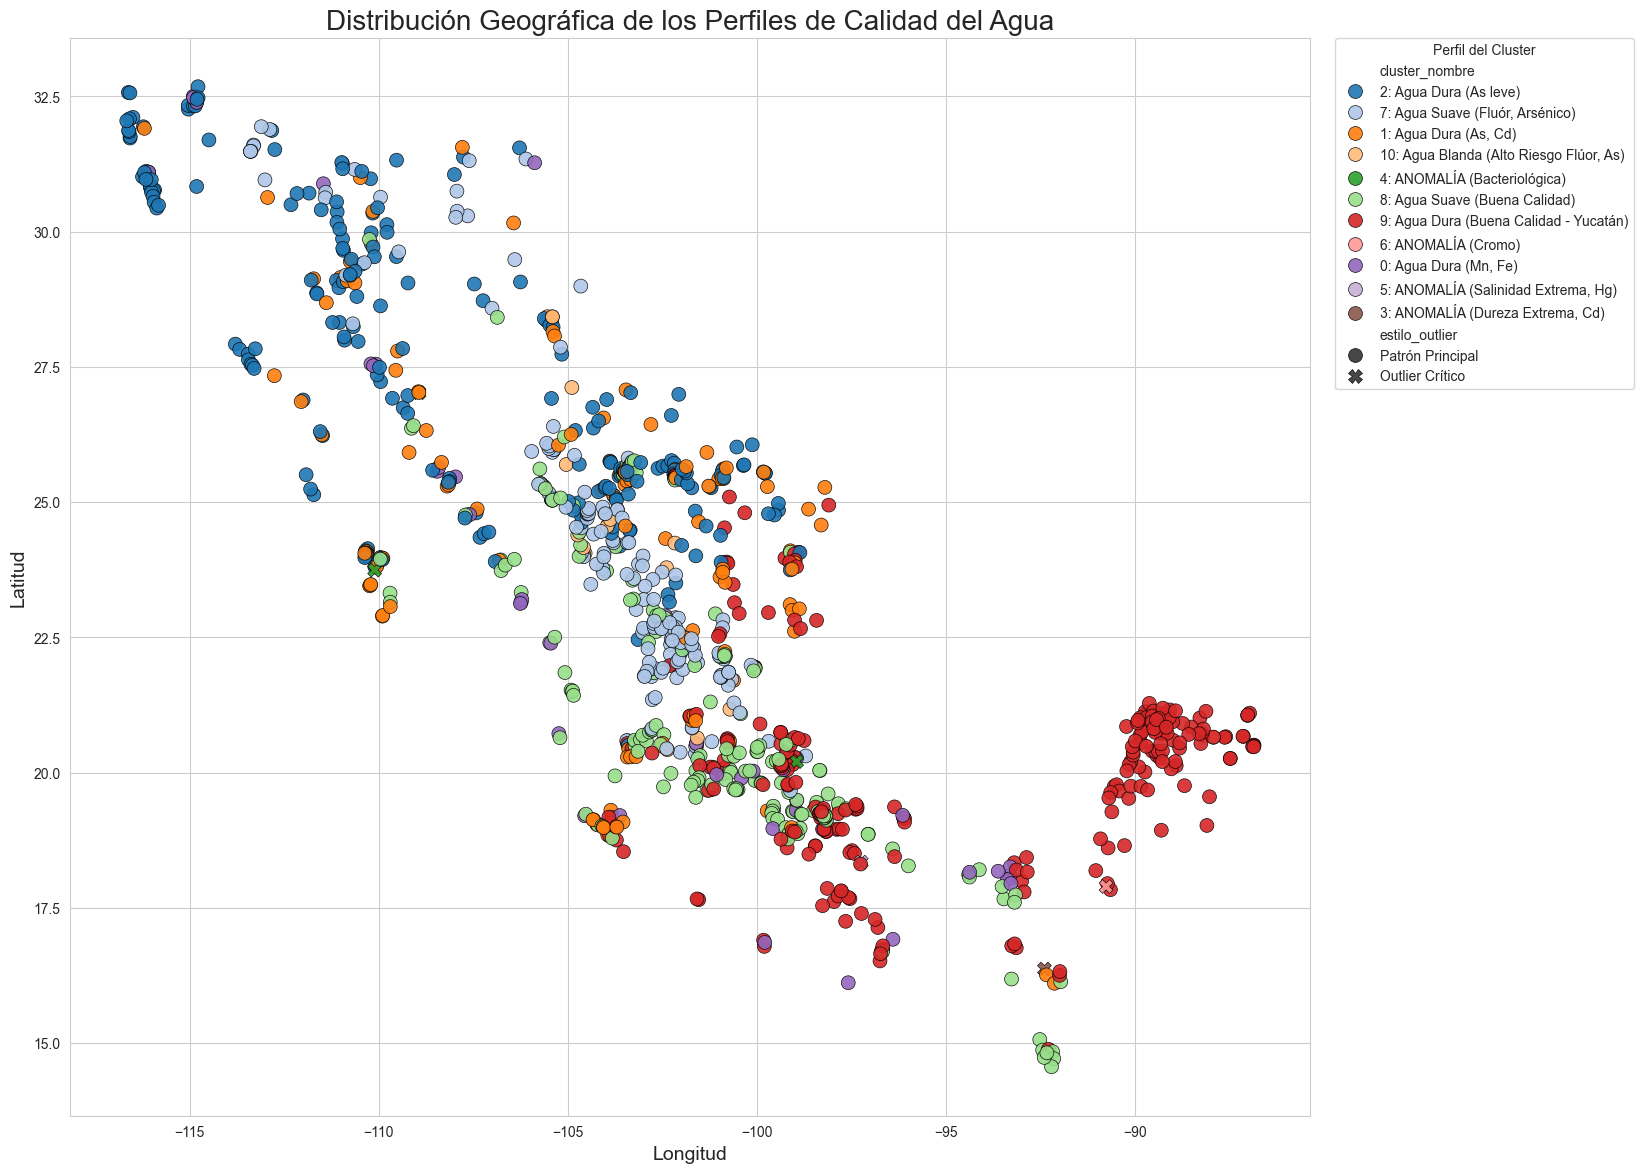

In [18]:
# --- Sección 7.4: Visualización Geográfica de los Clusters (Versión Mejorada) ---
# Nota: Renumerado a 7.4 para mantener el flujo lógico

if 'df_cleaned' in locals():
    # Crear un mapa de nombres de cluster para la leyenda del gráfico
    cluster_name_map = {
        0: '0: Agua Dura (Mn, Fe)',
        1: '1: Agua Dura (As, Cd)',
        2: '2: Agua Dura (As leve)',
        3: '3: ANOMALÍA (Dureza Extrema, Cd)',
        4: '4: ANOMALÍA (Bacteriológica)',
        5: '5: ANOMALÍA (Salinidad Extrema, Hg)',
        6: '6: ANOMALÍA (Cromo)',
        7: '7: Agua Suave (Fluór, Arsénico)',
        8: '8: Agua Suave (Buena Calidad)',
        9: '9: Agua Dura (Buena Calidad - Yucatán)',
        10: '10: Agua Blanda (Alto Riesgo Flúor, As)'
    }
    
    # Crear una nueva columna con los nombres descriptivos para el 'hue'
    df_cleaned['cluster_nombre'] = df_cleaned['cluster'].map(cluster_name_map)
    
    # Crear una columna para el estilo, para destacar los outliers
    outlier_cluster_ids = [3, 4, 5, 6]
    df_cleaned['estilo_outlier'] = df_cleaned['cluster'].apply(lambda x: 'Outlier Crítico' if x in outlier_cluster_ids else 'Patrón Principal')

    plt.figure(figsize=(16, 14))
    
    # Graficar usando hue para el nombre y style para destacar outliers
    sns.scatterplot(
        x='LONGITUD', 
        y='LATITUD', 
        hue='cluster_nombre',
        style='estilo_outlier', # Usar estilo para diferenciar outliers
        s=100, # Aumentar ligeramente el tamaño de los puntos
        edgecolor='black', # Añadir un borde para mejor visibilidad
        linewidth=0.5,
        palette='tab20', # Usar una paleta con más colores
        data=df_cleaned,
        alpha=0.9
    )
    
    plt.title('Distribución Geográfica de los Perfiles de Calidad del Agua', fontsize=20)
    plt.xlabel('Longitud', fontsize=14)
    plt.ylabel('Latitud', fontsize=14)
    plt.legend(title='Perfil del Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.show()

else:
    print("El DataFrame 'df_cleaned' no fue encontrado.")

# Análisis Exploratorio de Datos (EDA) y Modelado - Resumen Final de Hallazgos

A continuación, se presenta un resumen ejecutivo que responde a las preguntas clave del análisis, integrando los hallazgos desde la exploración inicial hasta la interpretación y validación final del modelo de clustering.

### 1. ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

**Sí, se identificaron y gestionaron patrones de ausencia de manera robusta y consistente.** Se detectó un patrón de ausencia correlacionada entre mediciones numéricas y sus etiquetas categóricas. En la **Sección 3**, se implementó una **imputación inteligente**: los valores numéricos se rellenaron con la mediana (una medida robusta a outliers), y sus etiquetas categóricas correspondientes se infirieron utilizando las reglas de negocio, garantizando la integridad lógica del dataset final. Además, se rellenaron los valores nulos de la columna `CONTAMINANTES` con una etiqueta explícita de "Sin Contaminantes".

### 2. ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Las estadísticas descriptivas de la **Sección 4.1** fueron fundamentales. Revelaron una **enorme disparidad de escalas** entre variables y **altas desviaciones estándar**, lo que hizo indispensable el uso de técnicas de **escalado** en la fase de preprocesamiento. Además, los valores máximos desproporcionados fueron la primera evidencia de la presencia de valores atípicos extremos.

### 3. ¿Hay valores atípicos en el conjunto de datos?

**Sí, y su identificación y manejo fue un resultado clave del análisis.** El EDA visual (**Sección 4.1**) sugirió su presencia a través de distribuciones fuertemente sesgadas. Este hallazgo fue **confirmado de manera concluyente por el modelo de clustering**, que al elegir `k=11`, aisló exitosamente **cuatro perfiles anómalos** (clusters 3, 4, 5 y 6), tres de ellos siendo "singletons". El análisis profundo en la **Sección 7.3** reveló que cada uno de estos outliers representaba una firma de contaminación única y extrema (ej. por Cromo, Mercurio, Coliformes, etc.).

### 4. ¿Cuál es la cardinalidad de las variables categóricas?

El análisis profundo de cardinalidad en la **Sección 4.0** fue crucial. Confirmó que variables como `CLAVE` y `SITIO` eran identificadores, y que `MUNICIPIO` y `ACUIFERO` tenían una cardinalidad demasiado alta para ser usadas directamente. Más importante aún, el análisis de la columna multi-etiqueta `CONTAMINANTES` reveló que los problemas de calidad más recurrentes son la **Dureza, Fluoruros y Arsénico**, un insight clave que no era visible en la superficie.

### 5. ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

**Sí, el sesgo fue una característica dominante y se aplicó una transformación esencial.** Las distribuciones con un fuerte sesgo a la derecha identificadas en la **Sección 4.1** hicieron obligatoria la aplicación de una **transformación logarítmica (`np.log1p`) en la Sección 5**. Este paso fue fundamental para estabilizar la varianza y cumplir con los supuestos de los algoritmos basados en distancia, siendo clave para el éxito del modelo.

### 6. ¿Se identifican tendencias temporales?

**No.** El análisis de la columna `PERIODO` reveló que todos los datos corresponden a un único punto en el tiempo (el año 2020), lo que imposibilita cualquier análisis de tendencias.

### 7. ¿Hay correlación entre las variables?

**Sí, se identificó y gestionó una fuerte multicolinealidad.** El mapa de calor de la **Sección 4.2** mostró una correlación (`0.88`) entre `CONDUCT_mS/cm` y `SDT_M_mg/L` que reflejaba una redundancia física. Para evitar el sesgo en el modelo, se tomó la decisión estratégica de **eliminar `SDT_M_mg/L`** del conjunto de entrenamiento.

### 8. ¿Cómo se distribuyen los datos en función de diferentes categorías?

El análisis geoespacial fue particularmente revelador. El mapa inicial de la **Sección 4.3** mostró que la mala calidad del agua (`SEMAFORO` Rojo) se concentra en regiones específicas. Esto fue confirmado y detallado por el mapa final de la **Sección 7.4**, que demostró que los **11 clusters identificados tienen una fuerte coherencia geográfica**, correspondiendo a perfiles hidrogeológicos reales (ej. el Cluster 9 en la Península de Yucatán).

### 9. ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

**Sí, este fue el hallazgo central y el principal éxito del proyecto.**
-   El análisis de diagnóstico (**Sección 6.1**) justificó la elección de **k=11** como el número óptimo de clusters.
-   El modelo K-Means particionó exitosamente el dataset en **7 perfiles de patrones principales y 4 perfiles de anomalías**.
-   El análisis de perfiles (**Sección 7.1**) tradujo estos grupos en **11 "firmas" de calidad del agua interpretables**, que van desde "Agua Suave de Buena Calidad" hasta perfiles de contaminación específicos.
-   Crucialmente, la **validación post-hoc (Sección 6.3)** demostró que este modelo base ya era lo suficientemente robusto para capturar implícitamente relaciones geoquímicas complejas (ratios), validando que no era necesario añadir características de ingeniería más complejas.

### 10. ¿Se deberían normalizar las imágenes para visualizarlas mejor?

Esta pregunta **no aplica**. El proceso análogo para datos tabulares, el **escalado o estandarización de características**, fue un paso **crítico y se realizó con éxito en la Sección 5** utilizando `StandardScaler`.

### 11. ¿Hay desequilibrio en las clases de la variable objetivo?

Dado que este es un problema de aprendizaje no supervisado, no existe una "variable objetivo". Sin embargo, el análisis reveló dos tipos de desequilibrio:
-   **Desequilibrio de Calidad Proxy (`SEMAFORO`):** El análisis mostró un desequilibrio en las categorías de calidad, con más muestras "Verdes" que de otros tipos.
-   **Desequilibrio de Clusters (Resultado Valioso):** Los **11 clusters** generados por el modelo son de tamaños muy desiguales. Esto es un resultado importante que refleja la realidad: algunos perfiles de agua (como el Cluster 9, n=273) son muy comunes, mientras que otros (los clusters de anomalías, n<=4) son eventos raros pero críticos.